In [1]:
%load_ext autoreload
%autoreload 2

import os
from datetime import datetime
from time import time
# import dill
import pickle
import glob
import importlib
import numpy as np
import scipy as sp
import scipy.misc
import pandas as pd
import re
import itertools
from scanf import scanf
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.ticker as mtick
from matplotlib import colors as mcolors
from matplotlib.colors import ListedColormap, BoundaryNorm, PowerNorm, Normalize
from mpl_toolkits.mplot3d import axes3d, Axes3D
from scipy.optimize import leastsq, curve_fit
from scipy import interpolate, integrate, optimize, sparse
from scipy.interpolate import interp1d, interp2d
from IPython.display import display, HTML, Math
from scipy import interpolate
from tqdm.notebook import tqdm as tqdm_notebook

# from act_act_src import baseClass
from act_src import particleClass
from act_src import interactionClass
from act_src import problemClass
from act_src import relationClass
from act_codeStore.support_class import *
from act_codeStore import support_fun as spf
from act_codeStore import support_fun_calculate as spc

PWD = os.getcwd()
np.set_printoptions(linewidth=110, precision=5)

params = {'animation.html': 'html5',
          'font.family':    'sans-serif',
          'font.size':      15, }
preamble = r' '
preamble = preamble + '\\usepackage{bm} '
preamble = preamble + '\\usepackage{amsmath} '
preamble = preamble + '\\usepackage{amssymb} '
preamble = preamble + '\\usepackage{mathrsfs} '
preamble = preamble + '\\DeclareMathOperator{\\Tr}{Tr} '
params['text.latex.preamble'] = preamble
params['text.usetex'] = True
plt.rcParams.update(params)

In [2]:
from act_codeStore.support_class import *
from act_codeStore import support_fun as spf
from act_codeStore import support_fun_calculate as spc
from act_codeStore import support_fun_show as sps
from collectiveFish.do_calculate import *

## continue version

remove folder small3_align2.56000_alpha0.00
make folder small3_align2.56000_alpha0.00
 
Collective motion solve, Zhang Ji, 2021. 
########################################################################
Generate Problem. 
  All the particles have a unified speed=1.000000, 
  All the particles have a unified length=-1.000000, 
  All the particles have a unified spin=0.000000, 
  Generate 3 particles with random seed None
  Generate method: random_sample. 
 
Solve, start time: 2023-01-07 22:48:02
 
Information about small3_align2.56000_alpha0.00 (behavior2DProblem): 
  This is a 2 dimensional problem, contain 3 objects. 
  update function: 1fe, update order: (0, 0), max loop: 1000000000
  t0=0.000000, t1=1001.000000, dt=1.000000
  save log file to small3_align2.56000_alpha0.00/log.small3_align2.56000_alpha0.00 
  save pickle file to small3_align2.56000_alpha0.00/pickle.small3_align2.56000_alpha0.00 
  rotational noise: 0.000000, translational noise: 0.000000
  align: 2.560000, attract: 0

  small3_align2.56000_alpha0.00:   0%|          | 0/100 [00:00<?, ?it/s]

Solve, finish time: 2023-01-07 22:48:02
Solve, usage time: 0:00:00.655248
 


(<Figure size 960x540 with 2 Axes>, True)

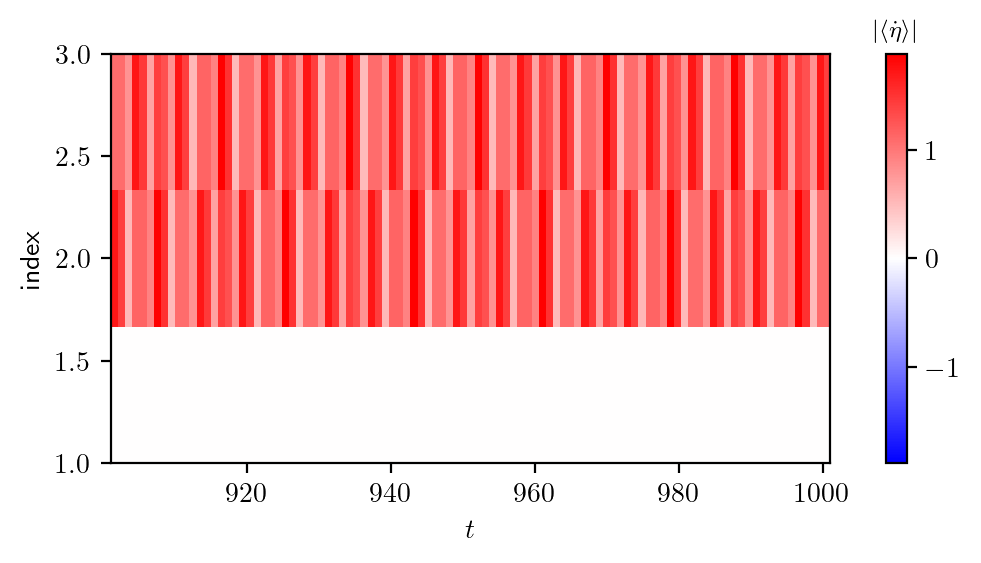

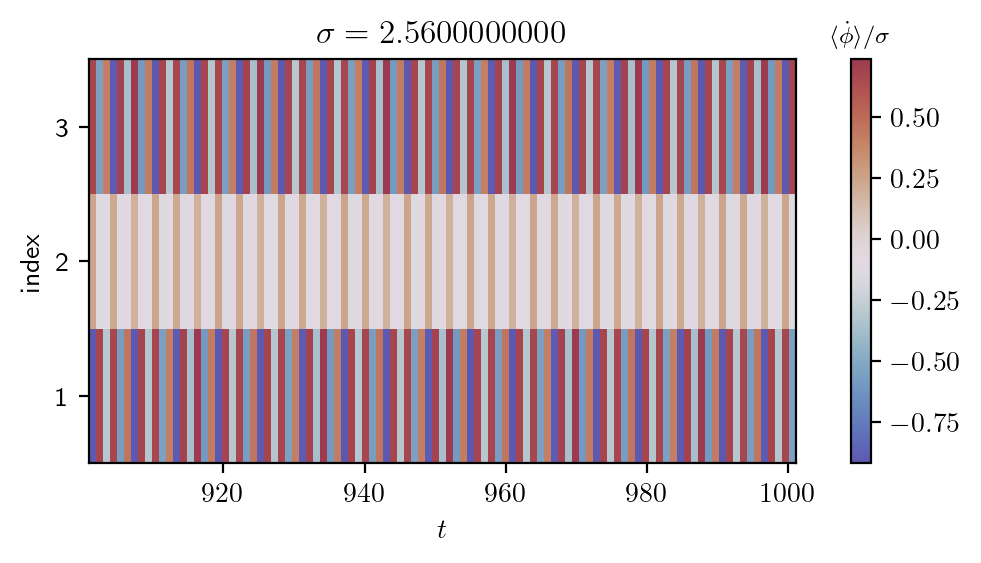

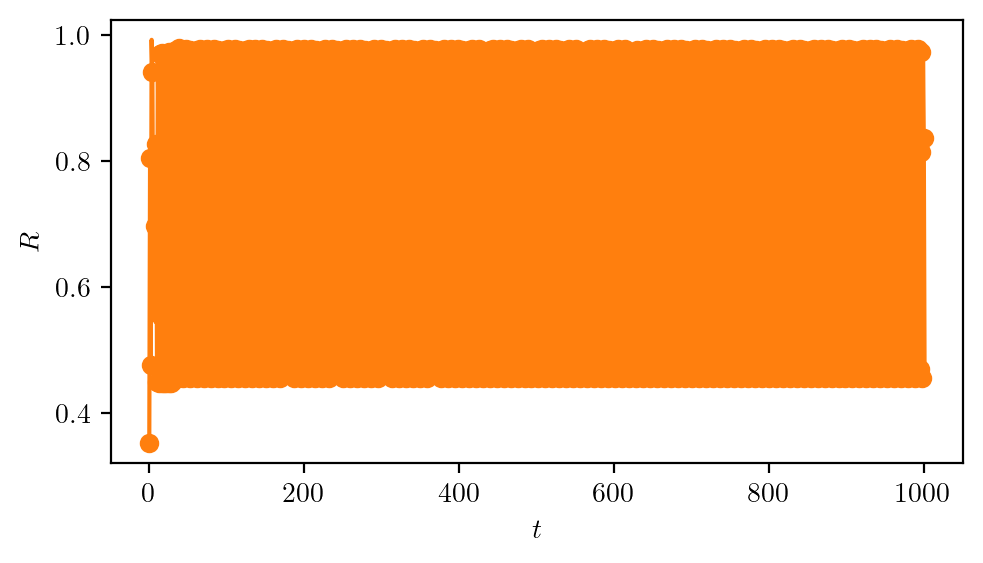

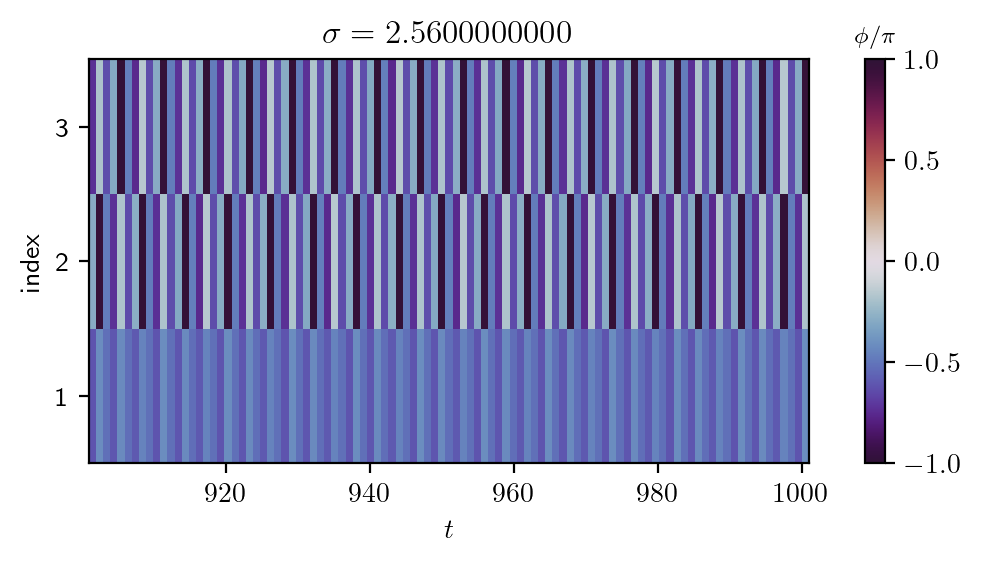

In [14]:
update_fun, update_order, eval_dt = '1fe', (0, 0), 1
# update_fun, update_order, eval_dt = '5bs', (1e-9, 1e-12), 0.01
nptc, calculate_fun = 3, 'do_phaseLag2D'
ini_t, max_t, Xlim = np.float64(0), 1001, 10
# alpha, rot_noise, localRange, phaseLag_rdm_fct, align = 0., 0, 1e12, 0, 0.843 * np.pi
alpha, rot_noise, localRange, phaseLag_rdm_fct, align = 0., 0, 1e12, 0, 2.56
seed = None
# fileHandle = 'small%d_align%05.2f_alpha%04.2f_dt%04.2e' % (nptc, align, alpha, eval_dt)
fileHandle = 'small%d_align%05.5f_alpha%04.2f' % (nptc, align, alpha)

problem_kwargs = {
    'ini_t':            ini_t,
    'max_t':            max_t,
    'update_fun':       update_fun,
    'update_order':     update_order,
    'eval_dt':          eval_dt,
    'calculate_fun':    calculate_fun_dict[calculate_fun],
    'prbHandle':        prbHandle_dict[calculate_fun],
    'rltHandle':        rltHandle_dict[calculate_fun],
    'ptcHandle':        ptcHandle_dict[calculate_fun],
    'fileHandle':       fileHandle,
    'save_every':       np.int64(1),
    'nptc':             np.int64(nptc),
    'overlap_epsilon':  np.float64(0),
    'un':               np.float64(1),
    'ln':               np.float64(-1),
    'Xlim':             np.float64(Xlim),
    'Xrange':           np.float64(Xlim),
    'attract':          np.float64(0),
    'align':            np.float64(align),
    'viewRange':        np.float64(1),
    'localRange':       np.float64(localRange),
    'phaseLag2D':       np.float64(alpha) * np.pi,
    'AR_k1':            np.float64(0),
    'AR_k2':            np.float64(0),
    'AR_k3':            np.float64(0),
    'AR_k4':            np.float64(0),
    'rot_noise':        np.float64(rot_noise), 
    'trs_noise':        np.float64(0), 
    'phaseLag_rdm_fct': np.float64(phaseLag_rdm_fct) * np.pi, 
    'seed':             seed,
    'tqdm_fun':         tqdm_notebook,
}

doPrb1 = problem_kwargs['calculate_fun'](**problem_kwargs)
prb1 = doPrb1.do_calculate(ini_t=ini_t, max_t=max_t, eval_dt=eval_dt, )

# do_hdf5(prb1, **problem_kwargs)
# prb1.hdf5_load(showInfo=False)

################################################################################3
%matplotlib inline

# figsize = np.array((9, 9)) * 0.5
# dpi = 200 if 'inline' in matplotlib.get_backend() else 100
# # plt_tmin, plt_tmax = ini_t, max_t
# plt_tmin, plt_tmax = max_t * 0.9, max_t
# resampling_fct, interp1d_kind = None, 'linear'
# sps.show_fig_fun(prb1, sps.core_trajectory2D, figsize=figsize, dpi=dpi, 
#                  plt_tmin=plt_tmin, resampling_fct=resampling_fct)
# ----------------------------------
figsize = np.array((16, 9)) * 0.3
dpi = 200 if 'inline' in matplotlib.get_backend() else 100
plt_tmin, plt_tmax = max_t * 0.9, max_t
resampling_fct, interp1d_kind = 1, 'linear'
# ----------------------------------
cmap=plt.get_cmap('bwr')
fig, axi = plt.subplots(1, 1, figsize=figsize, dpi=dpi, constrained_layout=True)
fig.patch.set_facecolor('white')
t_plot, avg_all = sps.cal_avrPhaseVelocity(problem=prb1, t_tmin=plt_tmin, t_tmax=plt_tmax,
                                           resampling_fct=resampling_fct, interp1d_kind=interp1d_kind,
                                           tavr=eval_dt, npabs=True)
sort_idx = np.argsort(np.mean(avg_all[:, t_plot > t_plot.max() / 2], axis=-1))
obj_idx = np.arange(1, prb1.n_obj + 1)
deta_all = avg_all[sort_idx, :] - avg_all[sort_idx[0], :]
vmm = np.max(np.abs(deta_all))
norm = Normalize(vmin=-vmm, vmax=vmm)
c = axi.pcolorfast(t_plot, obj_idx, deta_all, cmap=cmap, norm=norm)
clb = fig.colorbar(c, ax=axi)
clb.ax.set_title('$ | \\langle \\dot{\\eta} \\rangle | $', fontsize='small')
axi.set_xlabel('$t$')
axi.set_ylabel('index')
axi.set_xlim(t_plot.min(), t_plot.max())
axi.set_ylim(1, prb1.n_obj)
# ----------------------------------
cmap = sps.twilight_diverging()
sps.show_fig_fun(prb1, sps.core_avrPhaseVelocity, figsize=figsize, dpi=dpi, 
                 plt_tmin=plt_tmin, plt_tmax=plt_tmax, resampling_fct=resampling_fct, 
                 npabs=False, cmap=cmap, 
                 vmin=None, vmax=None, tavr=eval_dt, return_info=True)
# ----------------------------------
markevery, linestyle = 0.3, 'o-C1', 
fig, axi = plt.subplots(1, 1, figsize=figsize, dpi=dpi, constrained_layout=True)
fig.patch.set_facecolor('white')

# xlim, ylim = (1e-1, 2e3), (-0.1, 1.05e0)
t_hist, cplx_R = sps.cal_polar_order(prb1, t_tmax=np.inf)
odp_R = np.linalg.norm(cplx_R, axis=-1)
axi.plot(t_hist, odp_R, linestyle, markevery=markevery, )
axi.set_xlabel('$t$')
axi.set_ylabel('$R$')
# axi.set_xscale('log')
# # axi.set_yscale('log')
# axi.set_xlim(*xlim)
# axi.set_ylim(*ylim)
# axi.spines[['top', 'right']].set_visible(False)
# axi.spines['left'].set_position(('data', xlim[0]))
# axi.spines['bottom'].set_position(('data', ylim[0]))
# axi.plot(1, ylim[0], ">k", transform=axi.get_yaxis_transform(), clip_on=False)
# axi.plot(xlim[0], 1, "^k", transform=axi.get_xaxis_transform(), clip_on=False)
# ----------------------------------
cmap = plt.get_cmap('twilight_shifted')
sps.show_fig_fun(prb1, sps.core_avrPhase, figsize=figsize, dpi=dpi, 
                 plt_tmin=plt_tmin, plt_tmax=plt_tmax, 
                 resampling_fct=resampling_fct, cmap=cmap, 
                 tavr=eval_dt, sort_type='normal')

In [ ]:
print(eta1_hist[plt_eta_min_idx:plt_eta_max_idx] / np.pi)
print(deta1_fun(eta1_hist[plt_eta_min_idx:plt_eta_max_idx], eta2_hist[plt_eta_min_idx:plt_eta_max_idx], alpha, align) / np.pi)
print(np.nanmax(np.abs((deta1_hist - deta1_fun(eta1_hist, eta2_hist, alpha, align)))))

print(eta2_hist[plt_eta_min_idx:plt_eta_max_idx] / np.pi)
print(deta2_fun(eta1_hist[plt_eta_min_idx:plt_eta_max_idx], eta2_hist[plt_eta_min_idx:plt_eta_max_idx], alpha, align) / np.pi)
print(np.nanmax(np.abs((deta2_hist - deta2_fun(eta1_hist, eta2_hist, alpha, align)))))

In [3]:
# root_path = '/home/zhangji/fishSchool/chimera/'
# folder_name, job_name = 'small3_alpha0_b', 'small3_alpha0_b_align02.64_0020'
# #------------------------------------------------------------------------------------------
# pick_name = os.path.join(root_path, folder_name, job_name, 'pickle.%s' % job_name)
# hdf5_name = os.path.join(root_path, folder_name, job_name, 'hdf5.%s' % job_name)
# with open(pick_name, 'rb') as handle:
#     prb1 = pickle.load(handle)
# prb1.hdf5_load(hdf5_name=hdf5_name)

# ################################################################################3
# %matplotlib inline

# figsize = np.array((9, 9)) * 0.5
# dpi = 200 if 'inline' in matplotlib.get_backend() else 100
# plt_tmin, plt_tmax = ini_t, max_t
# resampling_fct, interp1d_kind = None, 'linear'
# sps.show_fig_fun(prb1, sps.core_trajectory2D, figsize=figsize, dpi=dpi, 
#                  plt_tmin=plt_tmin, resampling_fct=resampling_fct)
# # ----------------------------------
# figsize = np.array((16, 9)) * 0.3
# dpi = 200 if 'inline' in matplotlib.get_backend() else 100
# plt_tmin, plt_tmax = ini_t, max_t
# resampling_fct, interp1d_kind = 1, 'linear'
# # ----------------------------------
# cmap=plt.get_cmap('bwr')
# fig, axi = plt.subplots(1, 1, figsize=figsize, dpi=dpi, constrained_layout=True)
# fig.patch.set_facecolor('white')
# t_plot, avg_all = sps.cal_avrPhaseVelocity(problem=prb1, t_tmin=plt_tmin, t_tmax=plt_tmax,
#                                            resampling_fct=resampling_fct, interp1d_kind=interp1d_kind,
#                                            tavr=eval_dt, npabs=True)
# sort_idx = np.argsort(np.mean(avg_all[:, t_plot > t_plot.max() / 2], axis=-1))
# obj_idx = np.arange(1, prb1.n_obj + 1)
# deta_all = avg_all[sort_idx, :] - avg_all[sort_idx[0], :]
# vmm = np.max(np.abs(deta_all))
# norm = Normalize(vmin=-vmm, vmax=vmm)
# c = axi.pcolorfast(t_plot, obj_idx, deta_all, cmap=cmap, norm=norm)
# clb = fig.colorbar(c, ax=axi)
# clb.ax.set_title('$ | \\langle \\dot{\\eta} \\rangle | $', fontsize='small')
# axi.set_xlabel('$t$')
# axi.set_ylabel('index')
# axi.set_xlim(t_plot.min(), t_plot.max())
# axi.set_ylim(1, prb1.n_obj)
# # ----------------------------------
# vmin, vmax = 0, prb1.align
# norm = mcolors.Normalize(vmin=vmin, vmax=vmax)
# # norm = None
# cmap = plt.get_cmap('viridis')
# sps.show_fig_fun(prb1, sps.core_avrPhaseVelocity, figsize=figsize, dpi=dpi, 
#                  plt_tmin=plt_tmin, plt_tmax=plt_tmax, resampling_fct=resampling_fct, cmap=cmap, 
#                  vmin=None, vmax=None, norm=norm, tavr=eval_dt, return_info=True)
# # ----------------------------------
# markevery, linestyle = 0.3, 'o-C1', 
# fig, axi = plt.subplots(1, 1, figsize=figsize, dpi=dpi, constrained_layout=True)
# fig.patch.set_facecolor('white')

# # xlim, ylim = (1e-1, 2e3), (-0.1, 1.05e0)
# t_hist, cplx_R = sps.cal_polar_order(prb1, t_tmax=np.inf)
# odp_R = np.linalg.norm(cplx_R, axis=-1)
# axi.plot(t_hist, odp_R, linestyle, markevery=markevery, )
# axi.set_xlabel('$t$')
# axi.set_ylabel('$R$')
# # axi.set_xscale('log')
# # # axi.set_yscale('log')
# # axi.set_xlim(*xlim)
# # axi.set_ylim(*ylim)
# # axi.spines[['top', 'right']].set_visible(False)
# # axi.spines['left'].set_position(('data', xlim[0]))
# # axi.spines['bottom'].set_position(('data', ylim[0]))
# # axi.plot(1, ylim[0], ">k", transform=axi.get_yaxis_transform(), clip_on=False)
# # axi.plot(xlim[0], 1, "^k", transform=axi.get_xaxis_transform(), clip_on=False)
# # ----------------------------------
# cmap = plt.get_cmap('twilight_shifted')
# sps.show_fig_fun(prb1, sps.core_avrPhase, figsize=figsize, dpi=dpi, 
#                  plt_tmin=plt_tmin, plt_tmax=plt_tmax, 
#                  resampling_fct=resampling_fct, cmap=cmap, 
#                  tavr=eval_dt, sort_type='normal')
# sps.show_fig_fun(prb1, sps.core_avrPhase, figsize=figsize, dpi=dpi, 
#                  plt_tmin=plt_tmin, plt_tmax=plt_tmax, 
#                  resampling_fct=resampling_fct, cmap=cmap, 
#                  tavr=eval_dt, sort_type='traveling')

NameError: name 'ini_t' is not defined

0.0


<ipython-input-5-b42917303952>:56: RuntimeWarning: invalid value encountered in divide
  cqu = axi.quiver(eta1 / np.pi, eta2 / np.pi, deta1 / tnorm, deta2 / tnorm, tnorm / align,


Text(0.5, 1.0, '$t$')

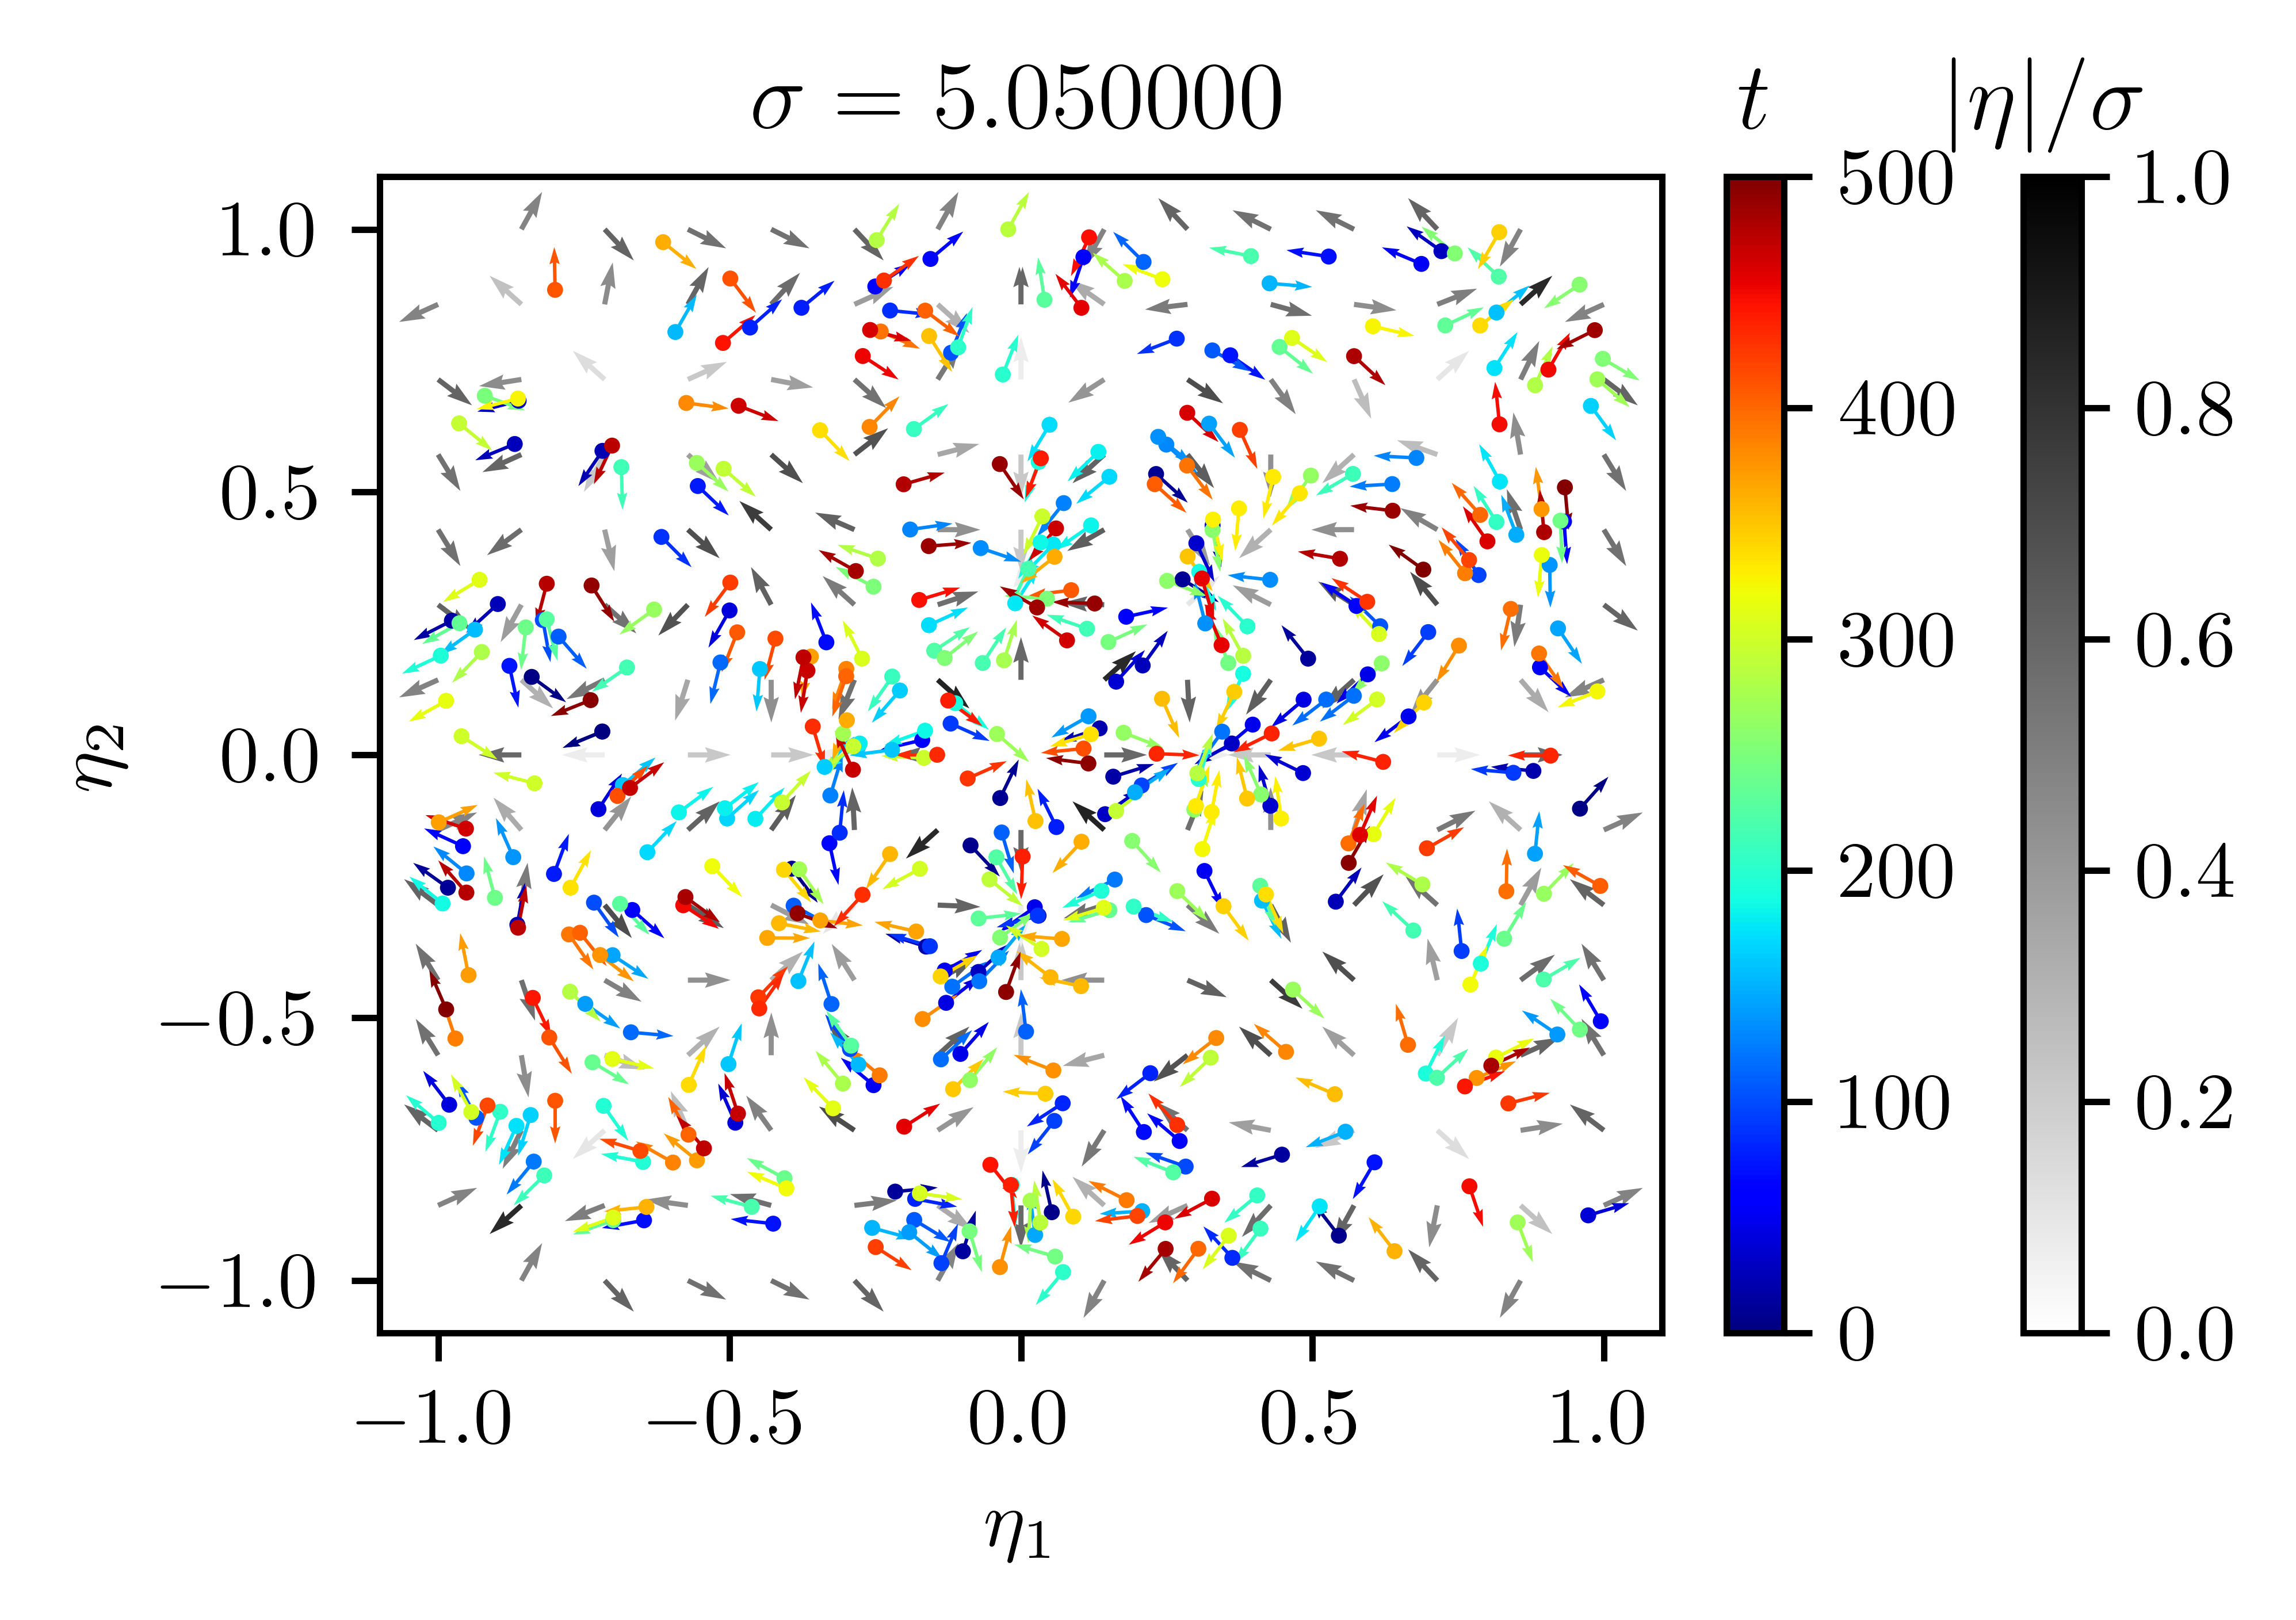

In [5]:
deta1_fun = lambda meat1, meta2, alpha, align: spf.warpToPi(-align / 2 * (2 * np.sin(meat1) * np.cos(alpha) + np.sin(meta2 + alpha) + np.sin(meat1 - meta2 - alpha)))
deta2_fun = lambda meat1, meta2, alpha, align: spf.warpToPi(-align / 2 * (2 * np.sin(meta2) * np.cos(alpha) + np.sin(meat1 + alpha) + np.sin(meta2 - meat1 - alpha)))
output_handle = '/home/zhangji/Documents/sysfolder/small3_b_sys/FIG' 
#
alpha = prb1.kwargs['phaseLag2D']
# alpha = 0
align = prb1.kwargs['align']
eta1_hist = spf.warpToPi(prb1.obj_list[2].phi_hist - prb1.obj_list[0].phi_hist)
eta2_hist = spf.warpToPi(prb1.obj_list[2].phi_hist - prb1.obj_list[1].phi_hist)
# deta1_hist = spf.warpToPi(prb1.obj_list[2].W_hist - prb1.obj_list[0].W_hist)
# deta2_hist = spf.warpToPi(prb1.obj_list[2].W_hist - prb1.obj_list[1].W_hist)
deta1_hist = deta1_fun(eta1_hist, eta2_hist, alpha, align)
deta2_hist = deta2_fun(eta1_hist, eta2_hist, alpha, align)
#
eta1, eta2 = np.meshgrid(np.linspace(-1, 1, 15) * np.pi, np.linspace(-1, 1, 15) * np.pi)
deta1 = deta1_fun(eta1, eta2, alpha, align)
deta2 = deta2_fun(eta1, eta2, alpha, align)
print(alpha)

# figsize = np.array((19, 9)) * 0.5
# dpi = 200
# cmap=plt.get_cmap('bwr')
# fig, axs = plt.subplots(1, 2, figsize=figsize, dpi=dpi, constrained_layout=True)
# fig.patch.set_facecolor('white')
# axi = axs[0]
# c = axi.pcolor(eta1 / np.pi, eta2 / np.pi, deta1 / np.pi, cmap=cmap, shading='auto')
# clb = fig.colorbar(c, ax=axi)
# clb.ax.set_title('$ | \\langle \\dot{\\eta_1} \\rangle | $', fontsize='small')
# axi.set_xlabel('$\\eta_1$')
# axi.set_ylabel('$\\eta_2$')
# # sps.colorline(eta1_hist / np.pi, eta2_hist / np.pi, ax=axi,  cmap=plt.get_cmap('Greys'), linewidth=0.3, alpha=1.0)
# axi.plot(eta1_hist / np.pi, eta2_hist / np.pi)
# # axi.plot(eta1_hist[0] / np.pi, eta2_hist[0] / np.pi, 's')
# axi = axs[1]
# c = axi.pcolor(eta1 / np.pi, eta2 / np.pi, deta2 / np.pi, cmap=cmap, shading='auto')
# clb = fig.colorbar(c, ax=axi)
# clb.ax.set_title('$ | \\langle \\dot{\\eta_2} \\rangle | $', fontsize='small')
# axi.set_xlabel('$\\eta_1$')
# axi.set_ylabel('$\\eta_2$')
# # sps.colorline(eta1_hist / np.pi, eta2_hist / np.pi, ax=axi,  cmap=plt.get_cmap('Greys'), linewidth=0.3, alpha=1.0)
# axi.plot(eta1_hist / np.pi, eta2_hist / np.pi)
# # axi.plot(eta1_hist[0] / np.pi, eta2_hist[0] / np.pi, 's')

figsize = np.array((13, 9)) * 0.3
dpi = 1000
plt_eta_min_idx = 0
plt_eta_max_idx = 500
cmap=plt.get_cmap('gray_r')
fig, axi = plt.subplots(1, 1, figsize=figsize, dpi=dpi, constrained_layout=True)
fig.patch.set_facecolor('white')
#----------------------------------------------------------------------------------------
tnorm = np.sqrt(deta1 ** 2 + deta2 ** 2)
# vmax = np.max(np.abs(tnorm))
vmax = 1
norm = Normalize(vmin=0, vmax=vmax)
cqu = axi.quiver(eta1 / np.pi, eta2 / np.pi, deta1 / tnorm, deta2 / tnorm, tnorm / align, 
                 norm=norm, cmap=cmap, angles='xy', scale=30)
#----------------------------------------------------------------------------------------
tnorm = np.sqrt(deta1_hist ** 2 + deta2_hist ** 2)
cmap = plt.get_cmap('jet')
norm = Normalize(vmin=prb1.t_hist[plt_eta_min_idx], vmax=prb1.t_hist[plt_eta_max_idx])
axi.quiver(eta1_hist[plt_eta_min_idx:plt_eta_max_idx] / np.pi, 
           eta2_hist[plt_eta_min_idx:plt_eta_max_idx] / np.pi, 
           deta1_hist[plt_eta_min_idx:plt_eta_max_idx] / tnorm[plt_eta_min_idx:plt_eta_max_idx], 
           deta2_hist[plt_eta_min_idx:plt_eta_max_idx] / tnorm[plt_eta_min_idx:plt_eta_max_idx], 
           prb1.t_hist[plt_eta_min_idx:plt_eta_max_idx], 
           norm=norm, cmap=cmap, angles='xy', scale=30)
# axi.plot(eta1_hist / np.pi, eta2_hist / np.pi, '.C1')
#----------------------------------------------------------------------------------------
csc = axi.scatter(eta1_hist[plt_eta_min_idx:plt_eta_max_idx] / np.pi, 
                  eta2_hist[plt_eta_min_idx:plt_eta_max_idx] / np.pi, 1, 
                  c=prb1.t_hist[plt_eta_min_idx:plt_eta_max_idx], cmap=cmap, norm=norm)
# axi.plot(eta1_hist[plt_eta_min_idx:plt_eta_max_idx] / np.pi, eta2_hist[plt_eta_min_idx:plt_eta_max_idx] / np.pi, '-.C2', linewidth=0.1)
# spr_idx = sps.separate_idx(np.vstack([eta1_hist[plt_eta_min_idx:plt_eta_max_idx], 
#                                       eta2_hist[plt_eta_min_idx:plt_eta_max_idx]]))
# for tidx0, tidx1 in spr_idx:
#     axi.plot(eta1_hist[plt_eta_min_idx:plt_eta_max_idx][tidx0:tidx1] / np.pi, 
#              eta2_hist[plt_eta_min_idx:plt_eta_max_idx][tidx0:tidx1] / np.pi, '-.C2')
# axi.plot(eta1_hist[plt_eta_min_idx] / np.pi, eta2_hist[plt_eta_min_idx] / np.pi, 's')
#----------------------------------------------------------------------------------------
axi.set_xlabel('$\\eta_1$')
axi.set_ylabel('$\\eta_2$')
axi.set_title('$\\sigma = %f$' % align)
# bbox_ax_top = axi.get_position()
# bbox_ax_bottom = axi.get_position()
# cqu_ax = fig.add_axes([1.2, bbox_ax_top.y0, 0.02, bbox_ax_top.y1-bbox_ax_top.y0])
# fig.colorbar(cqu, cax=cqu_ax).ax.set_title('$|\\eta| / \\sigma$')
# csc_ax = fig.add_axes([1.01, bbox_ax_top.y0, 0.02, bbox_ax_top.y1-bbox_ax_top.y0])
# fig.colorbar(csc, cax=csc_ax).ax.set_title('$t$')
fig.colorbar(cqu).ax.set_title('$|\\eta| / \\sigma$')
fig.colorbar(csc).ax.set_title('$t$')
# filename = os.path.join(output_handle, 'etaMap_%s.png' % prb1.kwargs['fileHandle'])
# fig.savefig(fname=filename, dpi=dpi)
# t1 = np.vstack(((np.arange(eta1_hist[plt_eta_min_idx:plt_eta_max_idx].size) + 1) * np.pi, 
#                 eta1_hist[plt_eta_min_idx:plt_eta_max_idx], 
#                 eta2_hist[plt_eta_min_idx:plt_eta_max_idx], 
#                 deta1_hist[plt_eta_min_idx:plt_eta_max_idx], 
#                 deta2_hist[plt_eta_min_idx:plt_eta_max_idx], 
#                 np.linalg.norm((deta1_hist[plt_eta_min_idx:plt_eta_max_idx], deta2_hist[plt_eta_min_idx:plt_eta_max_idx]), axis=0))).T
# print(t1 / np.pi)

# vmin, vmax = 0, prb1.align
# norm = mcolors.Normalize(vmin=vmin, vmax=vmax)
# # norm = None
# cmap = plt.get_cmap('viridis')
# sps.show_fig_fun(prb1, sps.core_avrPhaseVelocity, figsize=figsize, dpi=dpi, 
#                  plt_tmin=prb1.t_hist[plt_eta_min_idx], plt_tmax=prb1.t_hist[plt_eta_max_idx], 
#                  resampling_fct=resampling_fct, cmap=cmap, 
#                  vmin=None, vmax=None, norm=norm, tavr=eval_dt, return_info=True)

In [ ]:
print(eta1_hist / np.pi)
print(eta2_hist / np.pi)

In [49]:
2.645 / np.pi

0.8419296489561263

In [4]:
# %matplotlib inline

# update_fun, update_order, eval_dt = '1fe', (0, 0), 1
# # update_fun, update_order, eval_dt = '5bs', (1e-9, 1e-12), 0.01
# nptc, calculate_fun = 3, 'do_phaseLag2D'
# ini_t, max_t, Xlim = np.float64(0), 10001, 10
# alpha, rot_noise, localRange, phaseLag_rdm_fct, align = 0.56, 0, 1e12, 0, 4
# seed = 1
# # fileHandle = 'small%d_align%05.2f_alpha%04.2f_dt%04.2e' % (nptc, align, alpha, eval_dt)

# align_list = np.linspace(3, 7, 401)
# for align in align_list:
#     fileHandle = 'small%d_align%05.5f_alpha%04.2f' % (nptc, align, alpha)
#     problem_kwargs = {
#         'ini_t':            ini_t,
#         'max_t':            max_t,
#         'update_fun':       update_fun,
#         'update_order':     update_order,
#         'eval_dt':          eval_dt,
#         'calculate_fun':    calculate_fun_dict[calculate_fun],
#         'prbHandle':        prbHandle_dict[calculate_fun],
#         'rltHandle':        rltHandle_dict[calculate_fun],
#         'ptcHandle':        ptcHandle_dict[calculate_fun],
#         'fileHandle':       fileHandle,
#         'save_every':       np.int64(1),
#         'nptc':             np.int64(nptc),
#         'overlap_epsilon':  np.float64(0),
#         'un':               np.float64(1),
#         'ln':               np.float64(-1),
#         'Xlim':             np.float64(Xlim),
#         'Xrange':           np.float64(Xlim),
#         'attract':          np.float64(0),
#         'align':            np.float64(align),
#         'viewRange':        np.float64(1),
#         'localRange':       np.float64(localRange),
#         'phaseLag2D':       np.float64(alpha) * np.pi,
#         'AR_k1':            np.float64(0),
#         'AR_k2':            np.float64(0),
#         'AR_k3':            np.float64(0),
#         'AR_k4':            np.float64(0),
#         'rot_noise':        np.float64(rot_noise), 
#         'trs_noise':        np.float64(0), 
#         'phaseLag_rdm_fct': np.float64(phaseLag_rdm_fct) * np.pi, 
#         'seed':             seed,
#         'tqdm_fun':         tqdm_notebook,
#     }

#     doPrb1 = problem_kwargs['calculate_fun'](**problem_kwargs)
#     prb1 = doPrb1.do_calculate(ini_t=ini_t, max_t=max_t, eval_dt=eval_dt, )

#     deta1_fun = lambda meat1, meta2, alpha, align: -align / 2 * (2 * np.sin(meat1) * np.cos(alpha) + np.sin(meta2 + alpha) + np.sin(meat1 - meta2 - alpha))
#     deta2_fun = lambda meat1, meta2, alpha, align: -align / 2 * (2 * np.sin(meta2) * np.cos(alpha) + np.sin(meat1 + alpha) + np.sin(meta2 - meat1 - alpha))
#     output_handle = '/home/zhangji/Documents/sysfolder/small3_b_sys/FIG'
#     #
#     eta1_hist = spf.warpToPi(prb1.obj_list[2].phi_hist - prb1.obj_list[0].phi_hist)
#     eta2_hist = spf.warpToPi(prb1.obj_list[2].phi_hist - prb1.obj_list[1].phi_hist)
#     deta1_hist = spf.warpToPi(prb1.obj_list[2].W_hist - prb1.obj_list[0].W_hist)
#     deta2_hist = spf.warpToPi(prb1.obj_list[2].W_hist - prb1.obj_list[1].W_hist)
#     #
#     eta1, eta2 = np.meshgrid(np.linspace(-1, 1, 15) * np.pi, np.linspace(-1, 1, 15) * np.pi)
#     deta1 = deta1_fun(eta1, eta2, alpha, align)
#     deta2 = deta2_fun(eta1, eta2, alpha, align)

#     figsize = np.array((13, 9)) * 0.5
#     dpi = 1000
#     plt_eta_min_idx = 0
#     plt_eta_max_idx = -1
#     cmap=plt.get_cmap('gray_r')
#     fig, axi = plt.subplots(1, 1, figsize=figsize, dpi=dpi, constrained_layout=True)
#     fig.patch.set_facecolor('white')
#     tnorm = np.sqrt(deta1 ** 2 + deta2 ** 2)
#     # vmax = np.max(np.abs(tnorm))
#     vmax = 1
#     norm = Normalize(vmin=0, vmax=vmax)
#     cqu = axi.quiver(eta1 / np.pi, eta2 / np.pi, deta1 / tnorm, deta2 / tnorm, tnorm / align, 
#                      norm=norm, cmap=cmap, angles='xy', scale=30)
#     # axi.plot(eta1_hist / np.pi, eta2_hist / np.pi, '.C1')
#     cmap = plt.get_cmap('jet')
#     vmax = None
#     norm = Normalize(vmin=0, vmax=vmax)
#     csc = axi.scatter(eta1_hist[plt_eta_min_idx:plt_eta_max_idx] / np.pi, 
#                       eta2_hist[plt_eta_min_idx:plt_eta_max_idx] / np.pi, 1, 
#                       c=prb1.t_hist[plt_eta_min_idx:plt_eta_max_idx], cmap=cmap, norm=norm)
#     # axi.plot(eta1_hist[:plt_eta_max_idx] / np.pi, eta2_hist[:plt_eta_max_idx] / np.pi, '-.C2')
#     axi.plot(eta1_hist[0] / np.pi, eta2_hist[0] / np.pi, 's')
#     axi.set_xlabel('$\\eta_1$')
#     axi.set_ylabel('$\\eta_2$')
#     axi.set_title('$\\sigma = %f$' % align)
#     fig.colorbar(cqu).ax.set_title('$|\\eta| / \\sigma$')
#     fig.colorbar(csc).ax.set_title('$t$')
#     filename = os.path.join(output_handle, 'etaMap_%s.png' % prb1.kwargs['fileHandle'])
#     fig.savefig(fname=filename, dpi=dpi)


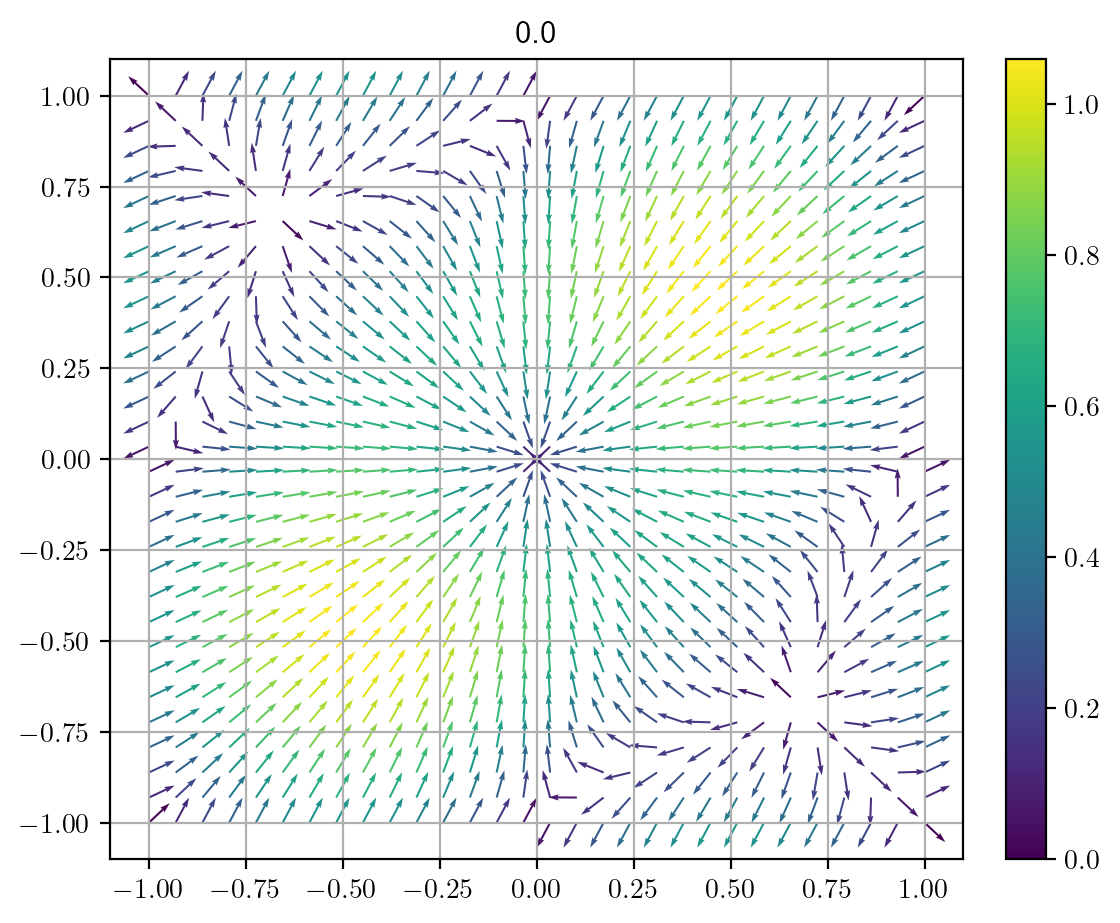

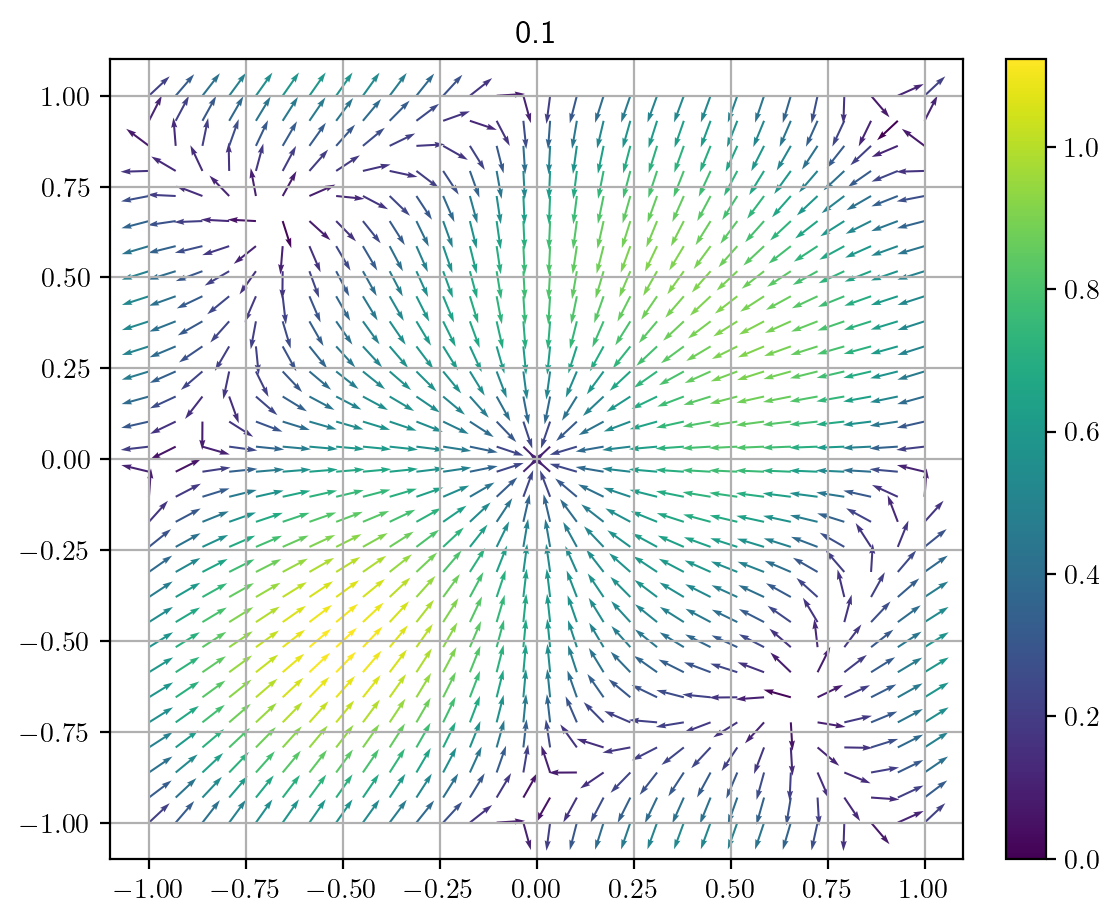

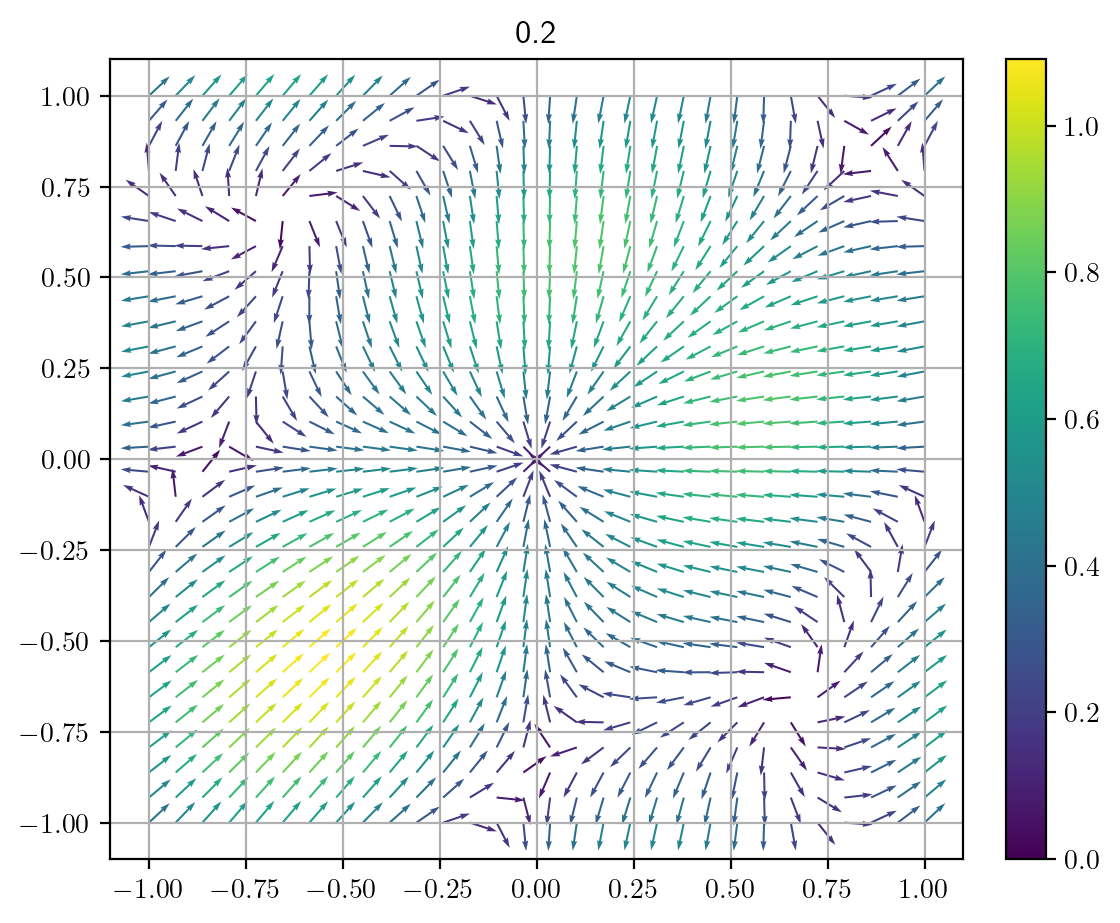

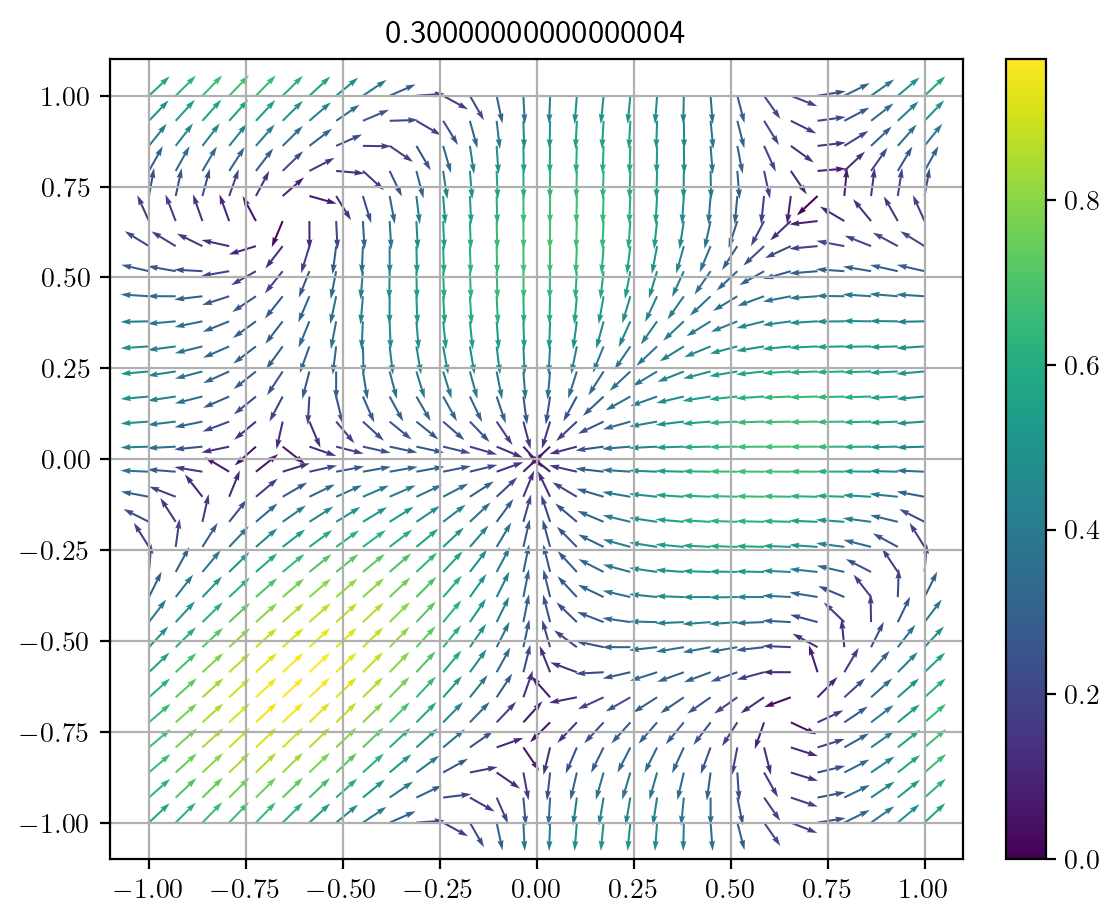

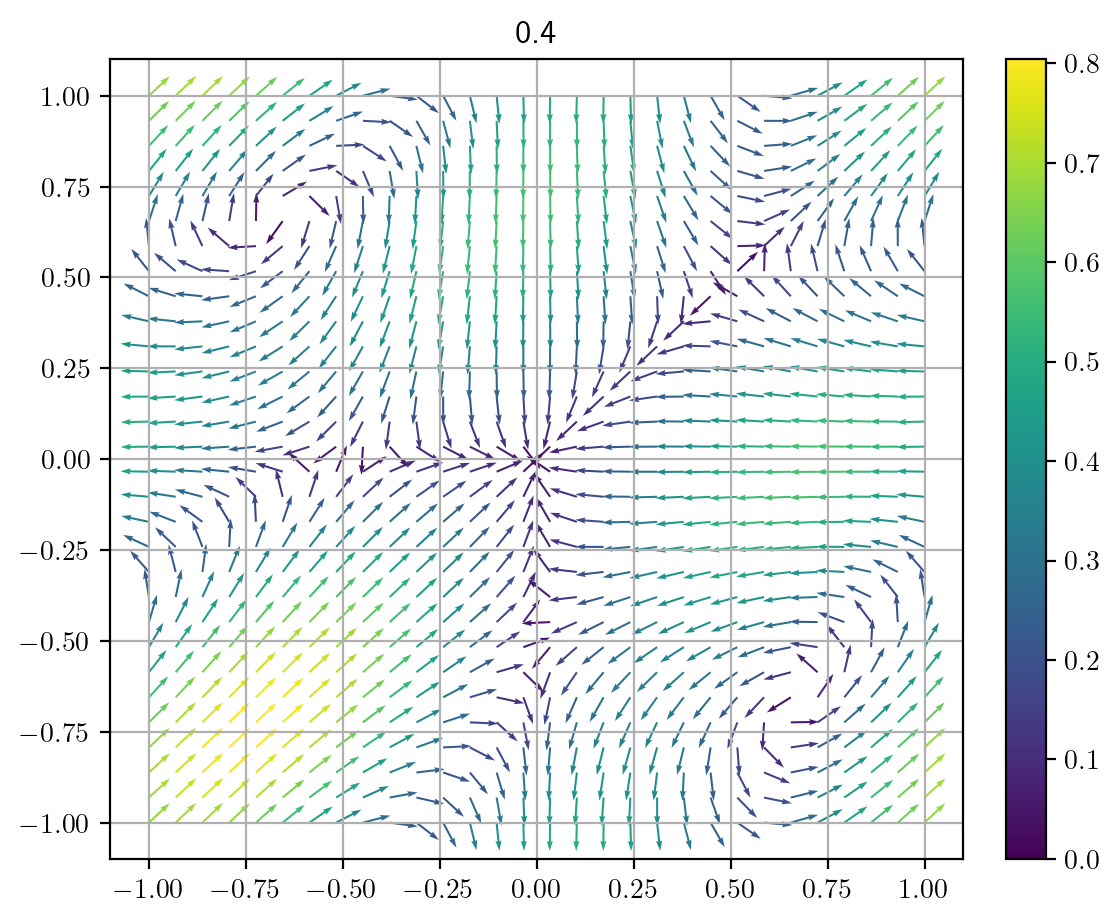

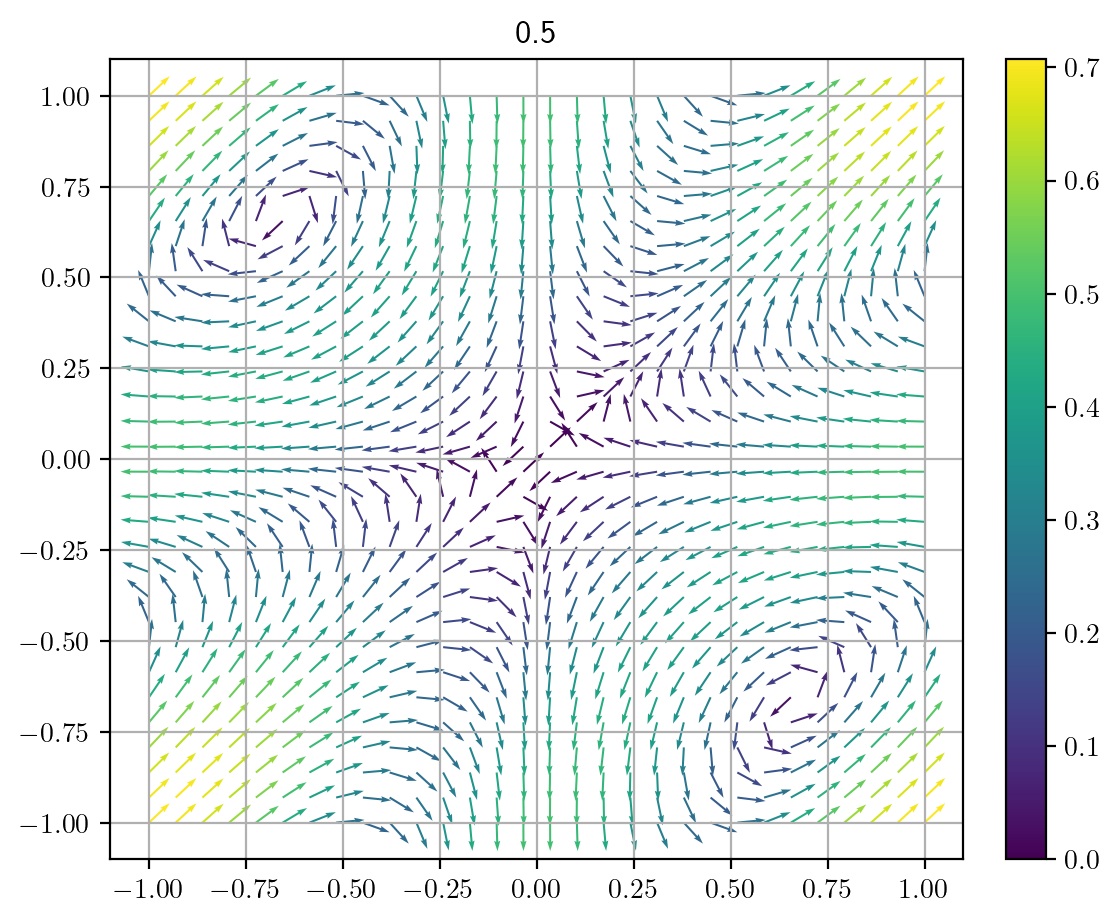

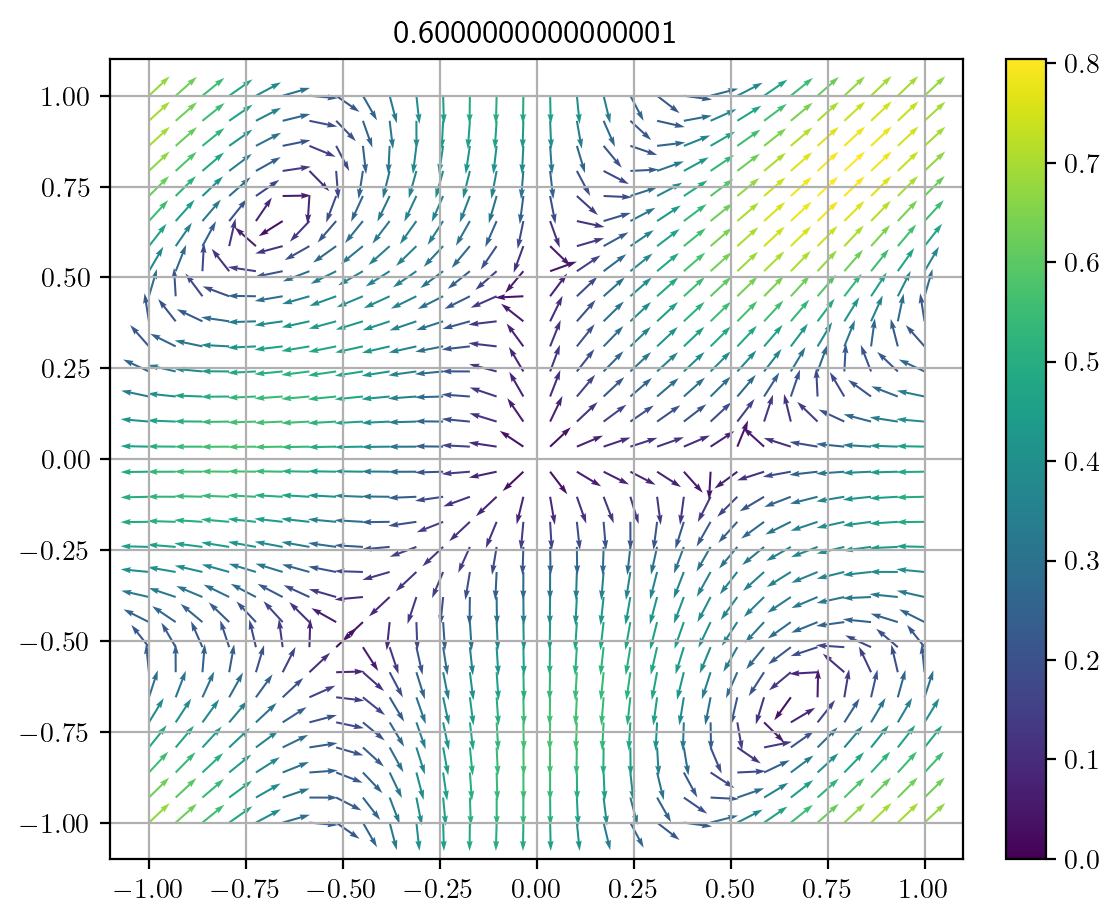

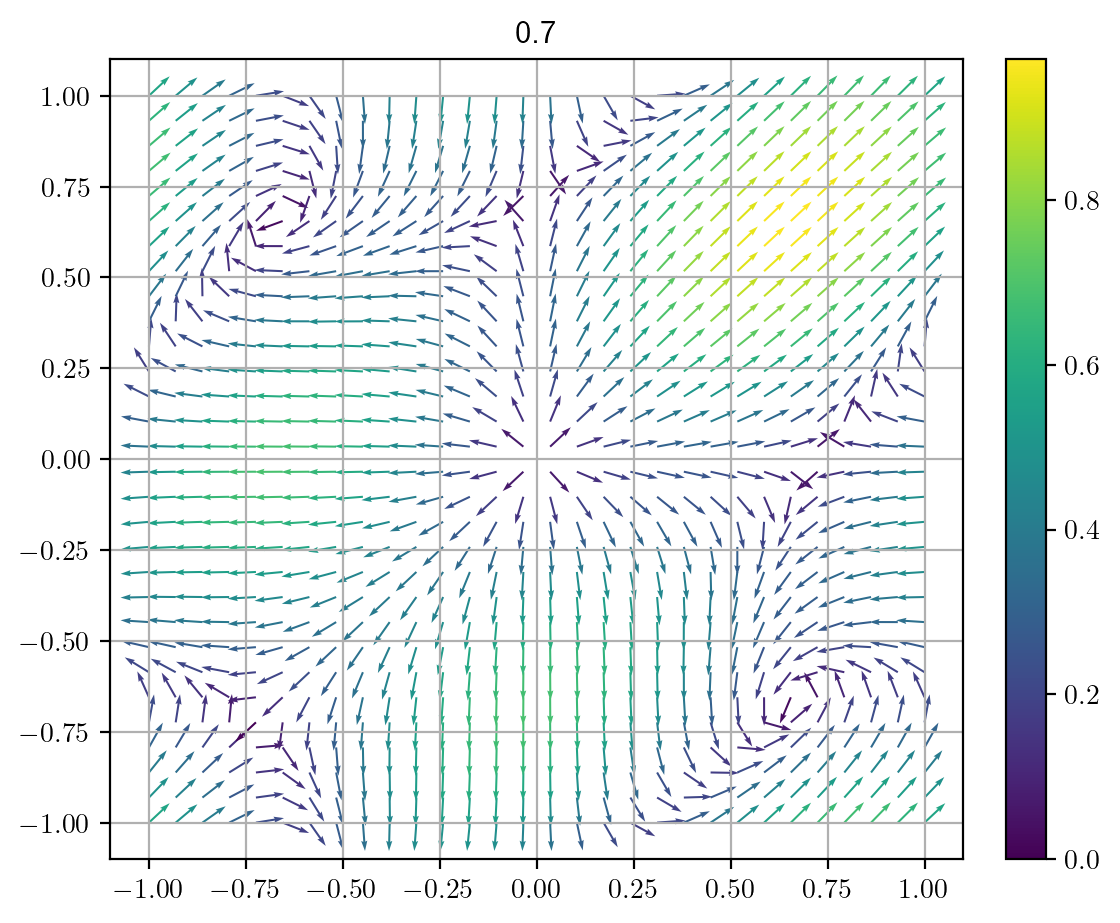

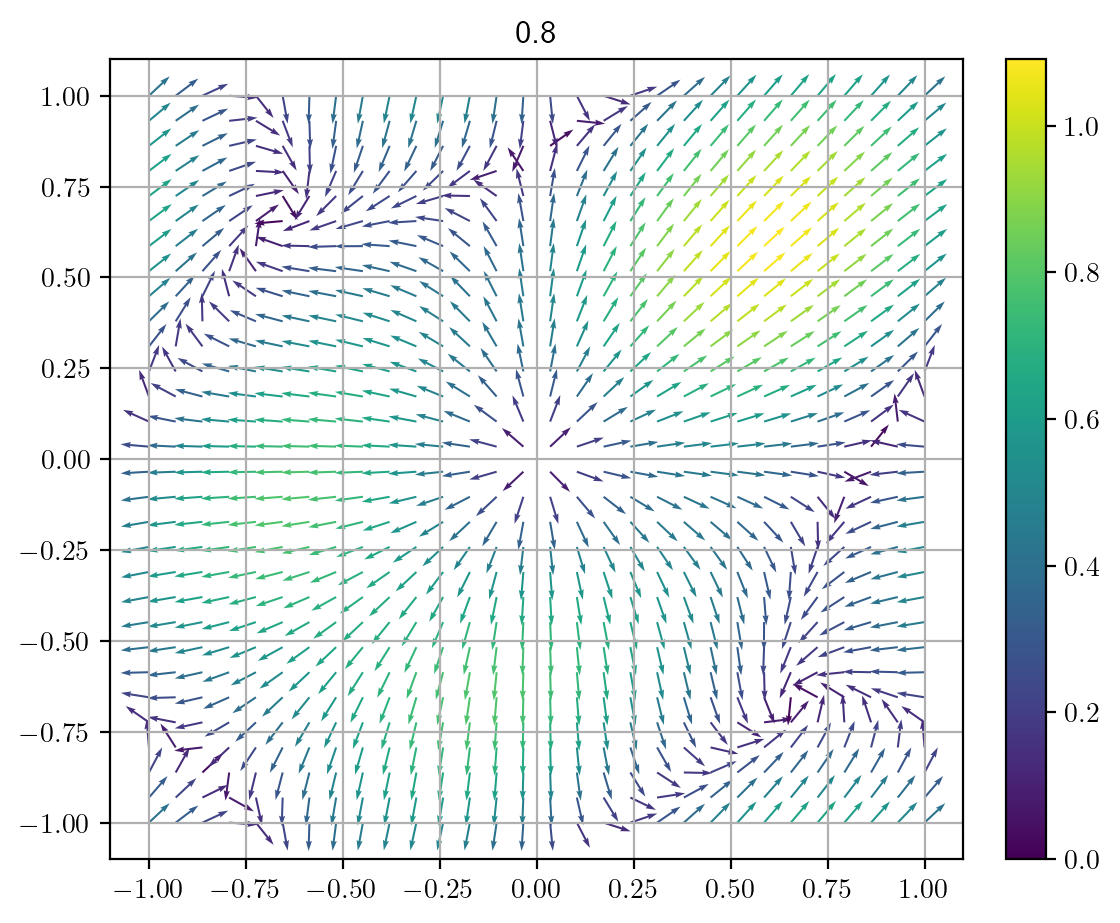

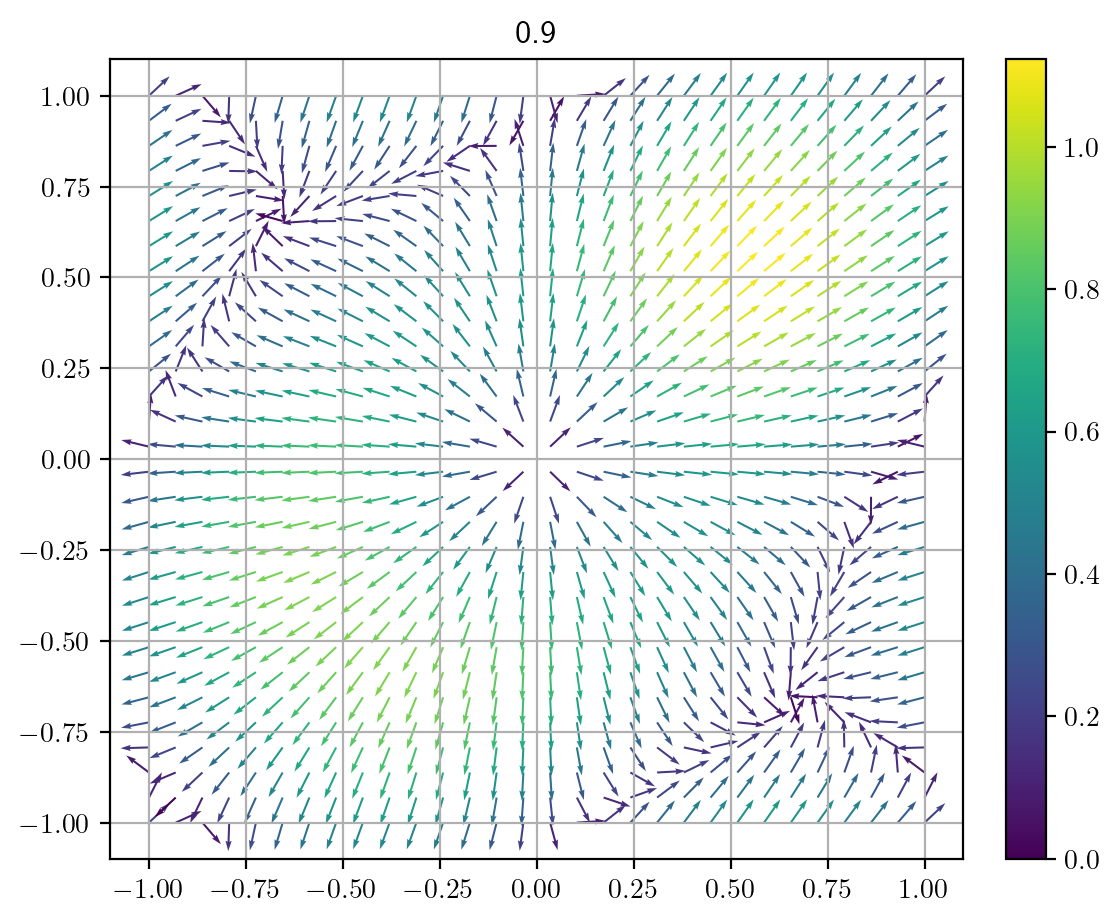

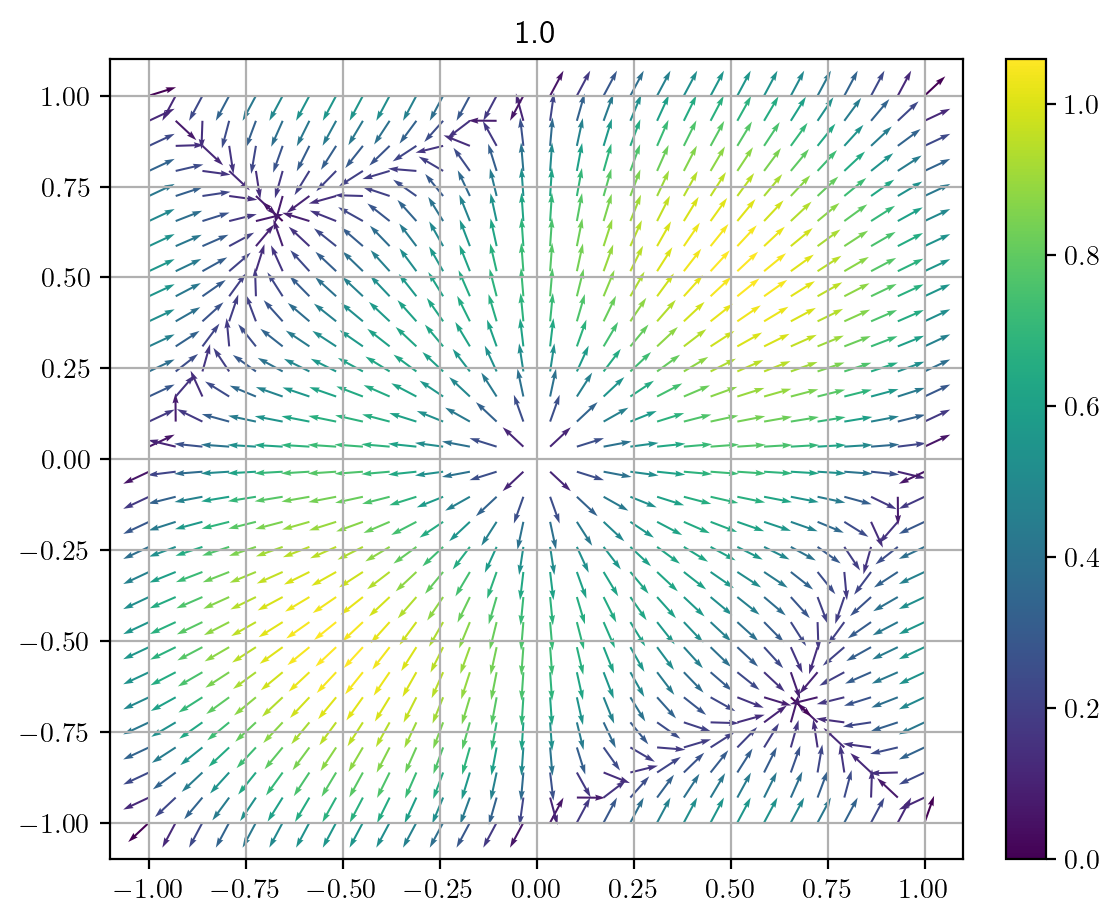

In [5]:
deta1_fun = lambda meat1, meta2, alpha, align: -align / 2 * (2 * np.sin(meat1) * np.cos(alpha) + np.sin(meta2 + alpha) + np.sin(meat1 - meta2 - alpha))
deta2_fun = lambda meat1, meta2, alpha, align: -align / 2 * (2 * np.sin(meta2) * np.cos(alpha) + np.sin(meat1 + alpha) + np.sin(meta2 - meat1 - alpha))
alpha = prb1.kwargs['phaseLag2D']
align = prb1.kwargs['align']

for alpha in np.linspace(0, 1, 11) * np.pi:
    eta1, eta2 = np.meshgrid(np.linspace(-1, 1, 30) * np.pi, np.linspace(-1, 1, 30) * np.pi)
    deta1 = deta1_fun(eta1, eta2, alpha, align)
    deta2 = deta2_fun(eta1, eta2, alpha, align)

#     figsize = np.array((32, 9)) * 0.5
#     dpi = 200
#     cmap=plt.get_cmap('bwr')
#     fig, axs = plt.subplots(1, 3, figsize=figsize, dpi=dpi, constrained_layout=True)
#     fig.patch.set_facecolor('white')
#     axi = axs[0]
#     c = axi.pcolor(eta1 / np.pi, eta2 / np.pi, deta1, cmap=cmap, shading='auto')
#     clb = fig.colorbar(c, ax=axi)
#     clb.ax.set_title('$ | \\langle \\dot{\\eta_1} \\rangle | $', fontsize='small')
#     axi.set_xlabel('$\\eta_1$')
#     axi.set_ylabel('$\\eta_2$')
#     axi = axs[1]
#     c = axi.pcolor(eta1 / np.pi, eta2 / np.pi, deta2, cmap=cmap, shading='auto')
#     clb = fig.colorbar(c, ax=axi)
#     clb.ax.set_title('$ | \\langle \\dot{\\eta_2} \\rangle | $', fontsize='small')
#     axi.set_xlabel('$\\eta_1$')
#     axi.set_ylabel('$\\eta_2$')
#     axi = axs[2]
#     axi.quiver(eta1 / np.pi, eta2 / np.pi, deta1 / np.pi, deta2 / np.pi, 
#                units='xy', angles='xy', scale=3)
#     axi.set_xlabel('$\\eta_1$')
#     axi.set_ylabel('$\\eta_2$')

    figsize = np.array((11, 9)) * 0.5
    dpi = 200
    cmap=plt.get_cmap('viridis')
    fig, axi = plt.subplots(1, 1, figsize=figsize, dpi=dpi, constrained_layout=True)
    fig.patch.set_facecolor('white')
    tnorm = np.sqrt(deta1 ** 2 + deta2 ** 2)
    norm = Normalize(vmin=0, vmax=np.max(np.abs(tnorm)))
    cqu = axi.quiver(eta1 / np.pi, eta2 / np.pi, deta1 / tnorm, deta2 / tnorm, tnorm, 
                     norm=norm, cmap=cmap, angles='xy', scale=30)
    fig.colorbar(cqu)
    axi.set_title(alpha / np.pi)
    axi.grid()

## discrete version

remove folder try_phaseLag2D
make folder try_phaseLag2D
 
Collective motion solve, Zhang Ji, 2021. 
########################################################################
Generate Problem. 
  All the particles have a unified speed=1.000000, 
  All the particles have a unified length=-1.000000, 
  Generate 3 particles with random seed 1
  Generate method: random_sample. 
 
Solve, start time: 2022-08-24 14:41:59
 
Information about try_phaseLag2D (behavior2DProblem): 
  This is a 2 dimensional problem, contain 3 objects. 
  update function: 1fe, update order: (0, 0), max loop: 1000000000
  t0=0.000000, t1=50.000000, dt=1.000000
  save log file to try_phaseLag2D/log.try_phaseLag2D 
  save pickle file to try_phaseLag2D/pickle.try_phaseLag2D 
  rotational noise: 0.000000, translational noise: 0.000000
  align: 6.000000, attract: 0.000000, viewRange: 1.000000, 
 
Information about selfPropelled2D (selfPropelled2D): 
  None
 
Information about phaseLag2D (phaseLag2D): 
  phaseLag=1.759292
 

  try_phaseLag2D:   0%|          | 0/100 [00:00<?, ?it/s]

Solve, finish time: 2022-08-24 14:41:59
Solve, usage time: 0:00:00.175086
 


norm in range (0.345837, 5.937348)


(<Figure size 960x540 with 2 Axes>, True)

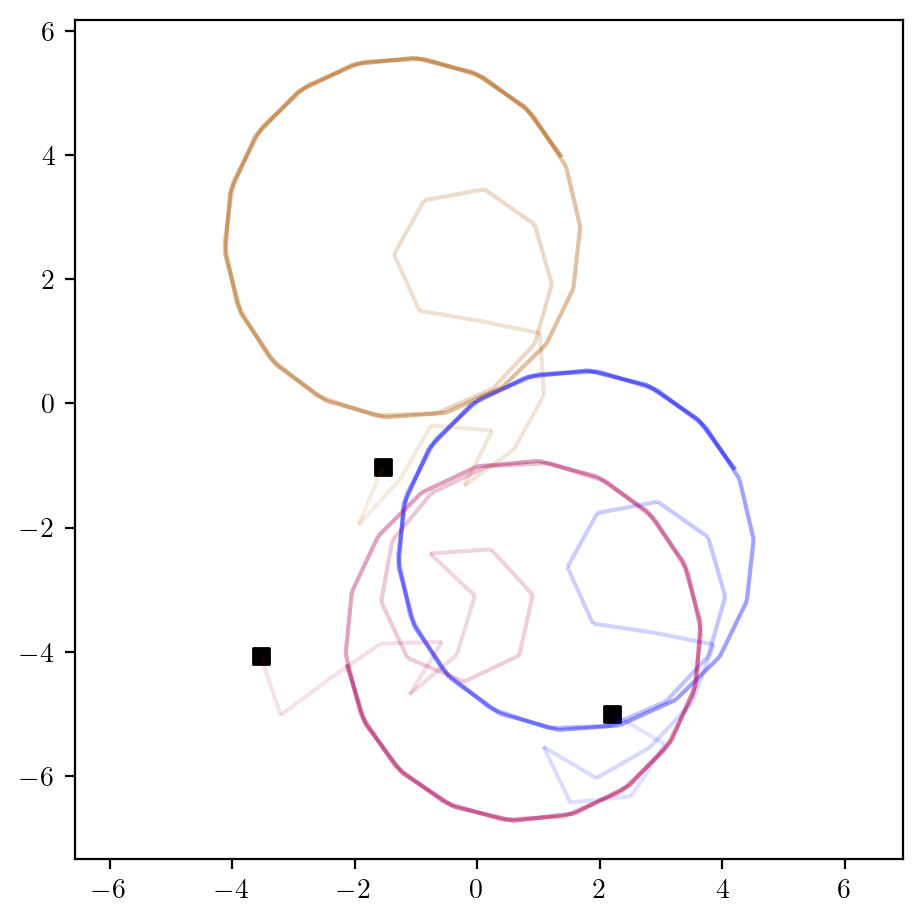

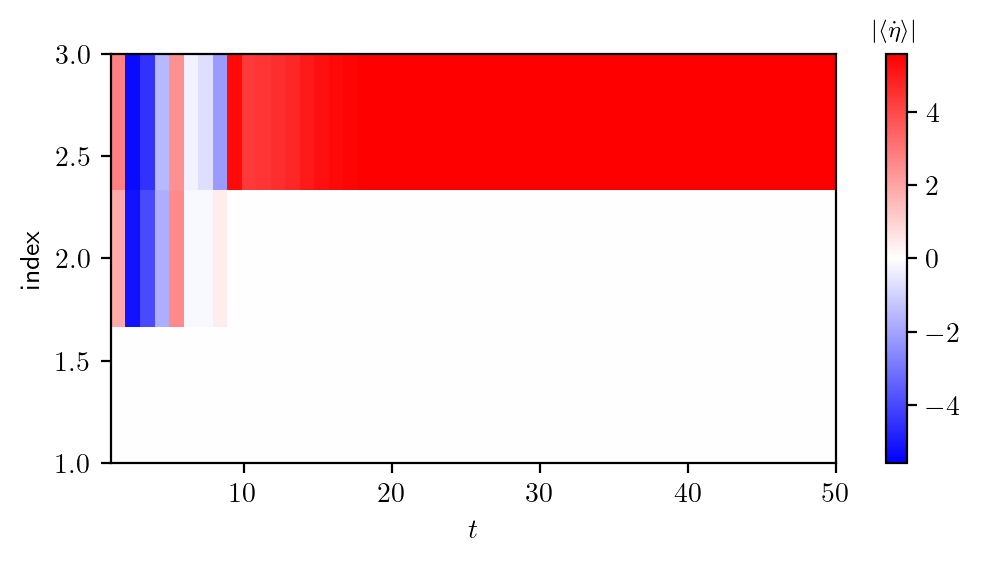

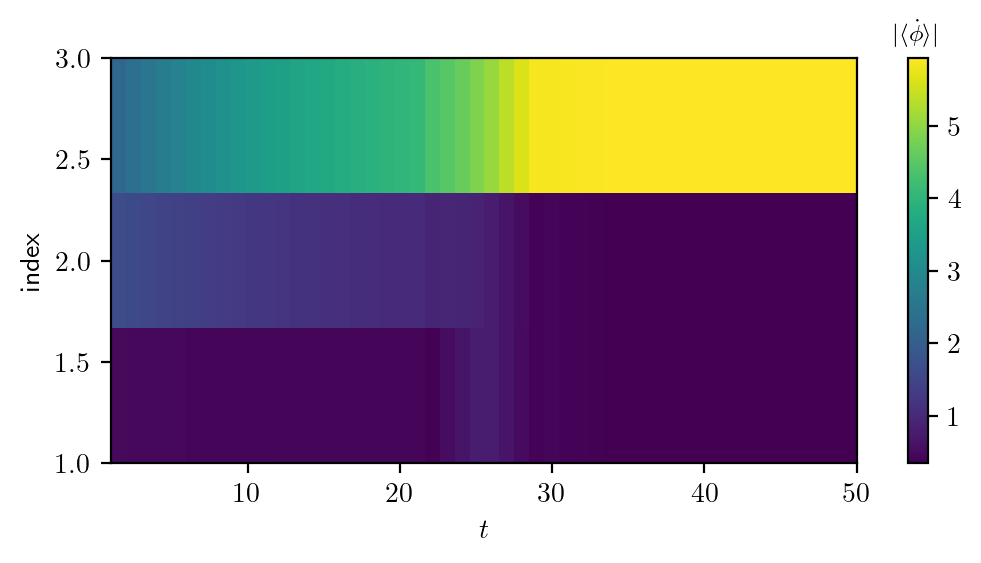

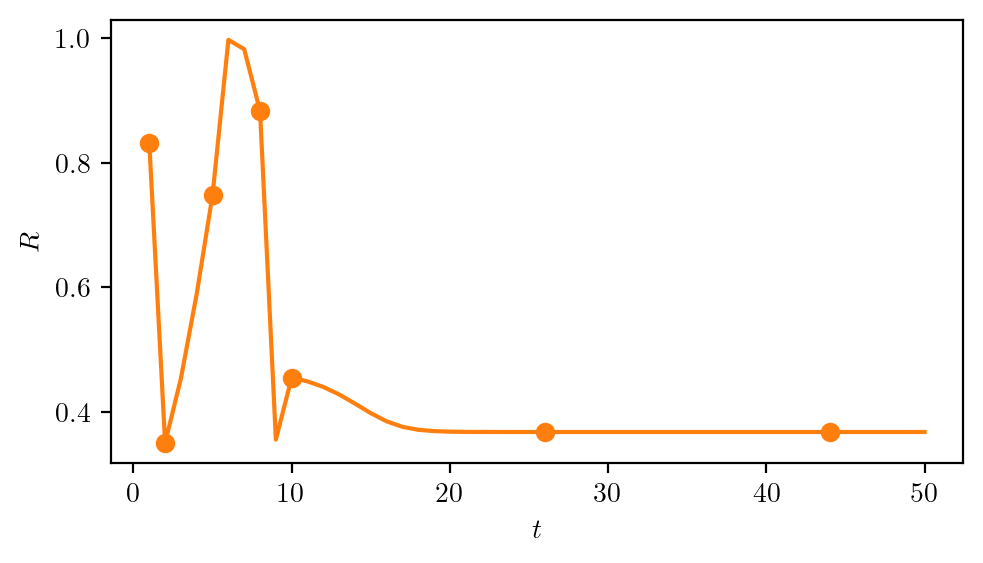

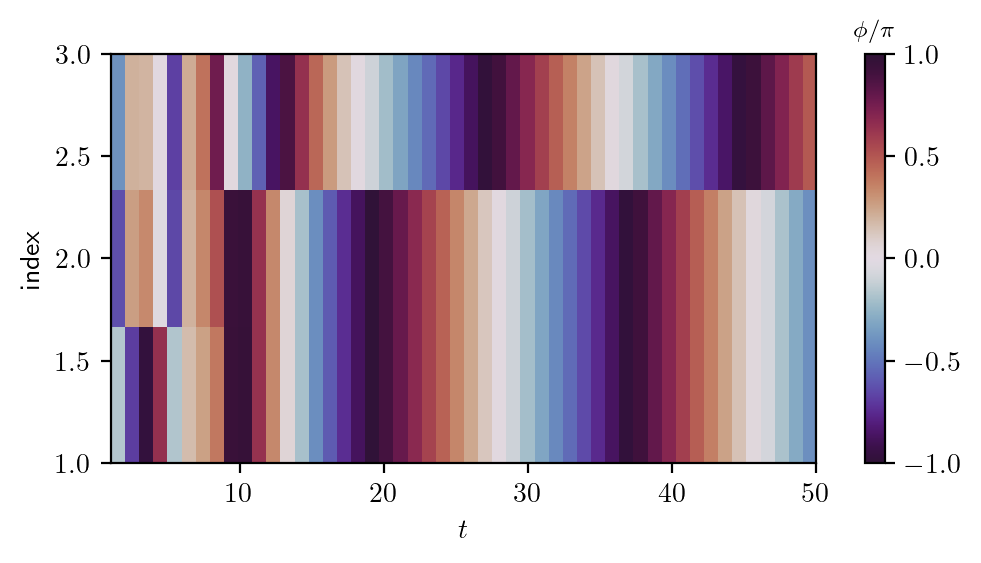

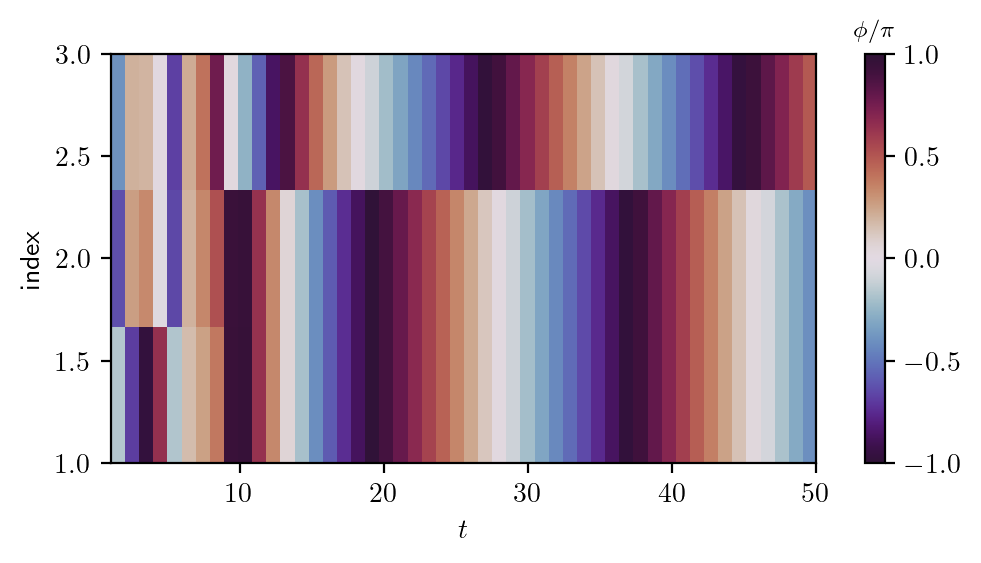

In [6]:
update_fun, update_order, eval_dt = '1fe', (0, 0), 0.1
# update_fun, update_order, eval_dt = '5bs', (1e-9, 1e-12), 0.01
nptc, calculate_fun = 3, 'do_phaseLag2D'
ini_t, max_t, Xlim = np.float64(0), 50, 10
alpha, rot_noise, localRange, phaseLag_rdm_fct, align = 0.56, 0, 1e12, 0, 6
seed = 1

problem_kwargs = {
    'ini_t':            ini_t,
    'max_t':            max_t,
    'update_fun':       update_fun,
    'update_order':     update_order,
    'eval_dt':          eval_dt,
    'calculate_fun':    calculate_fun_dict[calculate_fun],
    'prbHandle':        prbHandle_dict[calculate_fun],
    'rltHandle':        rltHandle_dict[calculate_fun],
    'ptcHandle':        ptcHandle_dict[calculate_fun],
    'fileHandle':       'try_phaseLag2D',
    'save_every':       np.int64(1),
    'nptc':             np.int64(nptc),
    'overlap_epsilon':  np.float64(0),
    'un':               np.float64(1),
    'ln':               np.float64(-1),
    'Xlim':             np.float64(Xlim),
    'Xrange':           np.float64(Xlim),
    'attract':          np.float64(0),
    'align':            np.float64(align),
    'viewRange':        np.float64(1),
    'localRange':       np.float64(localRange),
    'phaseLag2D':       np.float64(alpha) * np.pi,
    'AR_k1':            np.float64(0),
    'AR_k2':            np.float64(0),
    'AR_k3':            np.float64(0),
    'AR_k4':            np.float64(0),
    'rot_noise':        np.float64(rot_noise), 
    'trs_noise':        np.float64(0), 
    'phaseLag_rdm_fct': np.float64(phaseLag_rdm_fct) * np.pi, 
    'seed':             seed,
    'tqdm_fun':         tqdm_notebook,
}

doPrb1 = problem_kwargs['calculate_fun'](**problem_kwargs)
prb1 = doPrb1.do_calculate(ini_t=ini_t, max_t=max_t, eval_dt=eval_dt, )
# do_hdf5(prb1, **problem_kwargs)
# prb1.hdf5_load(showInfo=False)

################################################################################3
%matplotlib inline

figsize = np.array((9, 9)) * 0.5
dpi = 200 if 'inline' in matplotlib.get_backend() else 100
plt_tmin, plt_tmax = ini_t, max_t
resampling_fct, interp1d_kind = None, 'linear'
sps.show_fig_fun(prb1, sps.core_trajectory2D, figsize=figsize, dpi=dpi, 
                 plt_tmin=plt_tmin, resampling_fct=resampling_fct)
# ----------------------------------
figsize = np.array((16, 9)) * 0.3
dpi = 200 if 'inline' in matplotlib.get_backend() else 100
plt_tmin, plt_tmax = ini_t, max_t
resampling_fct, interp1d_kind = 1, 'linear'
# ----------------------------------
cmap=plt.get_cmap('bwr')
fig, axi = plt.subplots(1, 1, figsize=figsize, dpi=dpi, constrained_layout=True)
fig.patch.set_facecolor('white')
t_plot, avg_all = sps.cal_avrPhaseVelocity(problem=prb1, t_tmin=plt_tmin, t_tmax=plt_tmax,
                                           resampling_fct=resampling_fct, interp1d_kind=interp1d_kind,
                                           tavr=eval_dt, npabs=True)
sort_idx = np.argsort(np.mean(avg_all[:, t_plot > t_plot.max() / 2], axis=-1))
obj_idx = np.arange(1, prb1.n_obj + 1)
deta_all = avg_all[sort_idx, :] - avg_all[sort_idx[0], :]
vmm = np.max(np.abs(deta_all))
norm = Normalize(vmin=-vmm, vmax=vmm)
c = axi.pcolorfast(t_plot, obj_idx, deta_all, cmap=cmap, norm=norm)
clb = fig.colorbar(c, ax=axi)
clb.ax.set_title('$ | \\langle \\dot{\\eta} \\rangle | $', fontsize='small')
axi.set_xlabel('$t$')
axi.set_ylabel('index')
axi.set_xlim(t_plot.min(), t_plot.max())
axi.set_ylim(1, prb1.n_obj)
# ----------------------------------
vmin, vmax = 0, prb1.align
# norm = mcolors.Normalize(vmin=vmin, vmax=vmax)
norm = None
cmap = plt.get_cmap('viridis')
sps.show_fig_fun(prb1, sps.core_avrPhaseVelocity, figsize=figsize, dpi=dpi, 
                 plt_tmin=plt_tmin, plt_tmax=plt_tmax, resampling_fct=resampling_fct, cmap=cmap, 
                 vmin=None, vmax=None, norm=norm, tavr=40, return_info=True)
# ----------------------------------
markevery, linestyle = 0.3, 'o-C1', 
fig, axi = plt.subplots(1, 1, figsize=figsize, dpi=dpi, constrained_layout=True)
fig.patch.set_facecolor('white')

# xlim, ylim = (1e-1, 2e3), (-0.1, 1.05e0)
t_hist, cplx_R = sps.cal_polar_order(prb1, t_tmax=np.inf)
odp_R = np.linalg.norm(cplx_R, axis=-1)
axi.plot(t_hist, odp_R, linestyle, markevery=markevery, )
axi.set_xlabel('$t$')
axi.set_ylabel('$R$')
# axi.set_xscale('log')
# # axi.set_yscale('log')
# axi.set_xlim(*xlim)
# axi.set_ylim(*ylim)
# axi.spines[['top', 'right']].set_visible(False)
# axi.spines['left'].set_position(('data', xlim[0]))
# axi.spines['bottom'].set_position(('data', ylim[0]))
# axi.plot(1, ylim[0], ">k", transform=axi.get_yaxis_transform(), clip_on=False)
# axi.plot(xlim[0], 1, "^k", transform=axi.get_xaxis_transform(), clip_on=False)
# ----------------------------------
cmap = plt.get_cmap('twilight_shifted')
sps.show_fig_fun(prb1, sps.core_avrPhase, figsize=figsize, dpi=dpi, 
                 plt_tmin=plt_tmin, plt_tmax=plt_tmax, 
                 resampling_fct=resampling_fct, cmap=cmap, 
                 tavr=0.01, sort_type='normal')
sps.show_fig_fun(prb1, sps.core_avrPhase, figsize=figsize, dpi=dpi, 
                 plt_tmin=plt_tmin, plt_tmax=plt_tmax, 
                 resampling_fct=resampling_fct, cmap=cmap, 
                 tavr=0.01, sort_type='traveling')

/home/zhangji/ActiveMatter/act_codeStore/support_fun.py:238: RuntimeWarning: invalid value encountered in remainder
  return ((-phases + np.pi) % (2.0 * np.pi) - np.pi) * -1.0
<ipython-input-34-e8e01c7a7490>:48: RuntimeWarning: invalid value encountered in true_divide
  cqu = axi.quiver(eta1 / np.pi, eta2 / np.pi, deta1 / tnorm, deta2 / tnorm, tnorm,


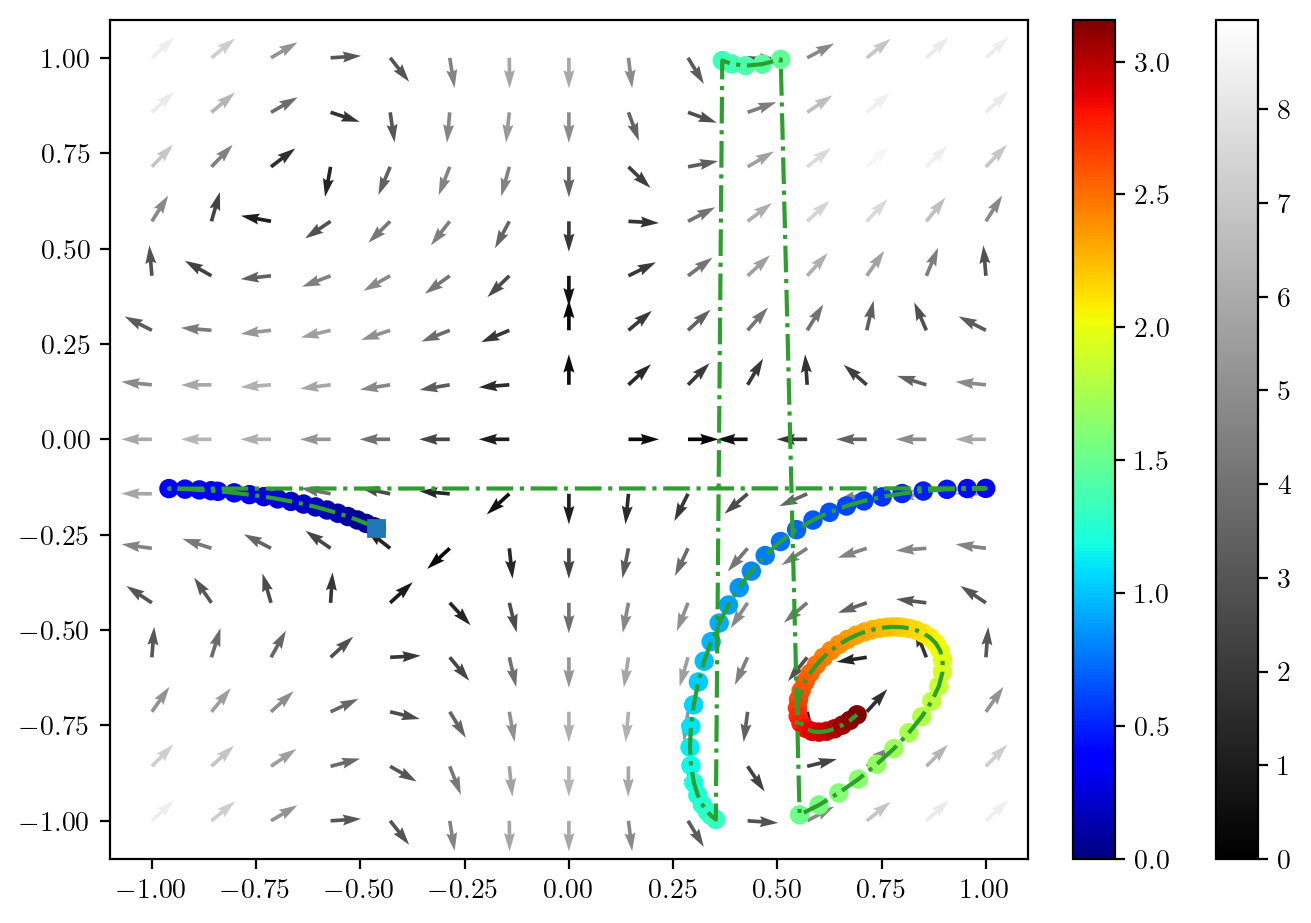

In [34]:
deta1_fun = lambda meat1, meta2, alpha, align: -align / 2 * (2 * np.sin(meat1) * np.cos(alpha) + np.sin(meta2 + alpha) + np.sin(meat1 - meta2 - alpha))
deta2_fun = lambda meat1, meta2, alpha, align: -align / 2 * (2 * np.sin(meta2) * np.cos(alpha) + np.sin(meat1 + alpha) + np.sin(meta2 - meat1 - alpha))
alpha = prb1.kwargs['phaseLag2D']
align = prb1.kwargs['align']
eta1_hist = spf.warpToPi(prb1.obj_list[2].phi_hist - prb1.obj_list[0].phi_hist)
eta2_hist = spf.warpToPi(prb1.obj_list[2].phi_hist - prb1.obj_list[1].phi_hist)
deta1_hist = spf.warpToPi(prb1.obj_list[2].W_hist - prb1.obj_list[0].W_hist)
deta2_hist = spf.warpToPi(prb1.obj_list[2].W_hist - prb1.obj_list[1].W_hist)
# deta1_hist = deta1_fun(eta1_hist, eta2_hist, alpha, align)
# deta2_hist = deta2_fun(eta1_hist, eta2_hist, alpha, align)
#
eta1, eta2 = np.meshgrid(np.linspace(-1, 1, 15) * np.pi, np.linspace(-1, 1, 15) * np.pi)
deta1 = deta1_fun(eta1, eta2, alpha, align)
deta2 = deta2_fun(eta1, eta2, alpha, align)

# figsize = np.array((19, 9)) * 0.5
# dpi = 200
# cmap=plt.get_cmap('bwr')
# fig, axs = plt.subplots(1, 2, figsize=figsize, dpi=dpi, constrained_layout=True)
# fig.patch.set_facecolor('white')
# axi = axs[0]
# c = axi.pcolor(eta1 / np.pi, eta2 / np.pi, deta1 / np.pi, cmap=cmap, shading='auto')
# clb = fig.colorbar(c, ax=axi)
# clb.ax.set_title('$ | \\langle \\dot{\\eta_1} \\rangle | $', fontsize='small')
# axi.set_xlabel('$\\eta_1$')
# axi.set_ylabel('$\\eta_2$')
# # sps.colorline(eta1_hist / np.pi, eta2_hist / np.pi, ax=axi,  cmap=plt.get_cmap('Greys'), linewidth=0.3, alpha=1.0)
# axi.plot(eta1_hist / np.pi, eta2_hist / np.pi)
# # axi.plot(eta1_hist[0] / np.pi, eta2_hist[0] / np.pi, 's')
# axi = axs[1]
# c = axi.pcolor(eta1 / np.pi, eta2 / np.pi, deta2 / np.pi, cmap=cmap, shading='auto')
# clb = fig.colorbar(c, ax=axi)
# clb.ax.set_title('$ | \\langle \\dot{\\eta_2} \\rangle | $', fontsize='small')
# axi.set_xlabel('$\\eta_1$')
# axi.set_ylabel('$\\eta_2$')
# # sps.colorline(eta1_hist / np.pi, eta2_hist / np.pi, ax=axi,  cmap=plt.get_cmap('Greys'), linewidth=0.3, alpha=1.0)
# axi.plot(eta1_hist / np.pi, eta2_hist / np.pi)
# # axi.plot(eta1_hist[0] / np.pi, eta2_hist[0] / np.pi, 's')

figsize = np.array((13, 9)) * 0.5
dpi = 200
plt_eta_max_idx = 100
cmap=plt.get_cmap('gray')
fig, axi = plt.subplots(1, 1, figsize=figsize, dpi=dpi, constrained_layout=True)
fig.patch.set_facecolor('white')
tnorm = np.sqrt(deta1 ** 2 + deta2 ** 2)
norm = Normalize(vmin=0, vmax=np.max(np.abs(tnorm)))
cqu = axi.quiver(eta1 / np.pi, eta2 / np.pi, deta1 / tnorm, deta2 / tnorm, tnorm, 
                 norm=norm, cmap=cmap, angles='xy', scale=30)
# axi.plot(eta1_hist / np.pi, eta2_hist / np.pi, '.C1')
cmap = plt.get_cmap('jet')
csc = axi.scatter(eta1_hist[:plt_eta_max_idx] / np.pi, eta2_hist[:plt_eta_max_idx] / np.pi, 
                  c=prb1.t_hist[:plt_eta_max_idx], cmap=cmap)
axi.plot(eta1_hist[:plt_eta_max_idx] / np.pi, eta2_hist[:plt_eta_max_idx] / np.pi, '-.C2')
# axi.plot(eta1_hist / np.pi, eta2_hist / np.pi, )
axi.plot(eta1_hist[0] / np.pi, eta2_hist[0] / np.pi, 's')
fig.colorbar(cqu)
fig.colorbar(csc)


In [22]:
t1 = np.vstack((eta1_hist, eta2_hist, deta1_hist, deta2_hist)).T
print(t1[:plt_eta_max_idx, :] / np.pi)

[[-0.46152 -0.23214      nan      nan]
 [-0.46152 -0.23214 -0.58716  0.29369]
 [ 0.95132  0.06154  0.34676  0.08002]
 [-0.70192  0.14156  0.0306  -0.17665]
 [-0.67132 -0.03508  0.18859  0.0613 ]
 [-0.48274  0.02622  0.51729 -0.04759]
 [ 0.03455 -0.02138  0.04571 -0.04483]
 [ 0.08026 -0.06621  0.05445 -0.17663]
 [ 0.13471 -0.24284 -0.13684 -0.84291]
 [-0.00212  0.91425 -0.00288  0.29669]]


In [15]:
# print(np.nanmax(np.abs(spf.warpToPi(prb1.obj_list[2].W_hist - prb1.obj_list[0].W_hist) - deta1_fun(eta1_hist, eta2_hist, alpha, align))))
# print(spf.warpToPi(prb1.obj_list[2].W_hist - prb1.obj_list[0].W_hist) - deta1_fun(eta1_hist, eta2_hist, alpha, align))
# print(spf.warpToPi(prb1.obj_list[2].W_hist - prb1.obj_list[1].W_hist))
# print()
# print(deta2_fun(eta1_hist, eta2_hist, alpha, align))

6.283185307179586


/home/zhangji/ActiveMatter/act_codeStore/support_fun.py:238: RuntimeWarning: invalid value encountered in remainder
  return ((-phases + np.pi) % (2.0 * np.pi) - np.pi) * -1.0


remove folder try_phaseLag2D
make folder try_phaseLag2D
 
Collective motion solve, Zhang Ji, 2021. 
########################################################################
Generate Problem. 
  All the particles have a unified speed=1.000000, 
  All the particles have a unified length=-1.000000, 
  Generate 3 particles with random seed None
  Generate method: random_sample. 
 
Solve, start time: 2022-08-24 16:14:31
 
Information about try_phaseLag2D (behavior2DProblem): 
  This is a 2 dimensional problem, contain 3 objects. 
  update function: 1fe, update order: (0, 0), max loop: 1000000000
  t0=0.000000, t1=100.000000, dt=1.000000
  save log file to try_phaseLag2D/log.try_phaseLag2D 
  save pickle file to try_phaseLag2D/pickle.try_phaseLag2D 
  rotational noise: 0.000000, translational noise: 0.000000
  align: 6.000000, attract: 0.000000, viewRange: 1.000000, 
 
Information about selfPropelled2D (selfPropelled2D): 
  None
 
Information about phaseLag2D (phaseLag2D): 
  phaseLag=1.7592

  try_phaseLag2D:   0%|          | 0/100 [00:00<?, ?it/s]

Solve, finish time: 2022-08-24 16:14:31
Solve, usage time: 0:00:00.205212
 


norm in range (0.036526, 5.938767)


/home/zhangji/ActiveMatter/act_codeStore/support_fun.py:238: RuntimeWarning: invalid value encountered in remainder
  return ((-phases + np.pi) % (2.0 * np.pi) - np.pi) * -1.0
<ipython-input-104-f3d8aaf3b1cf>:106: RuntimeWarning: invalid value encountered in true_divide
  cqu = axi.quiver(eta1 / np.pi, eta2 / np.pi, deta1 / tnorm, deta2 / tnorm, tnorm / np.pi,


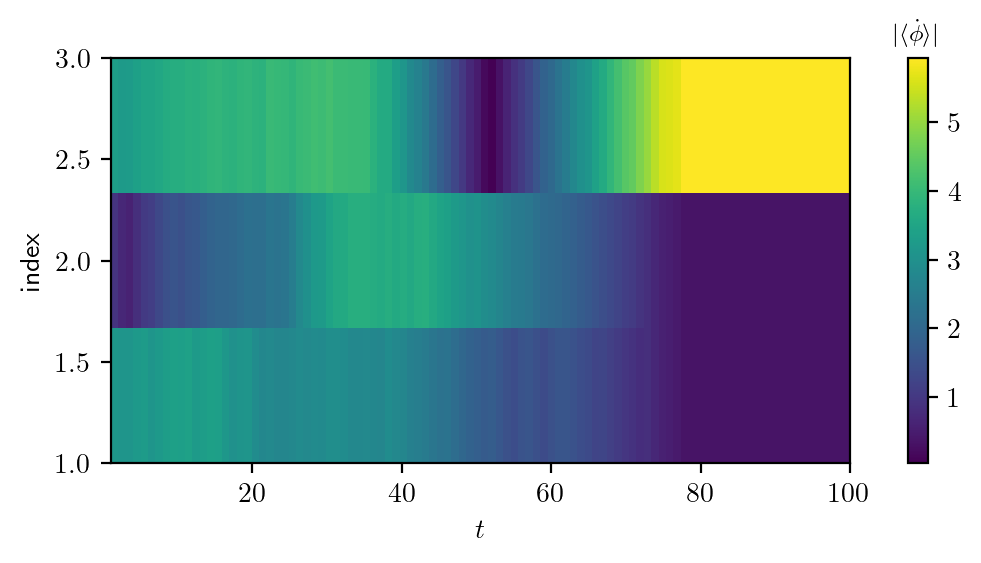

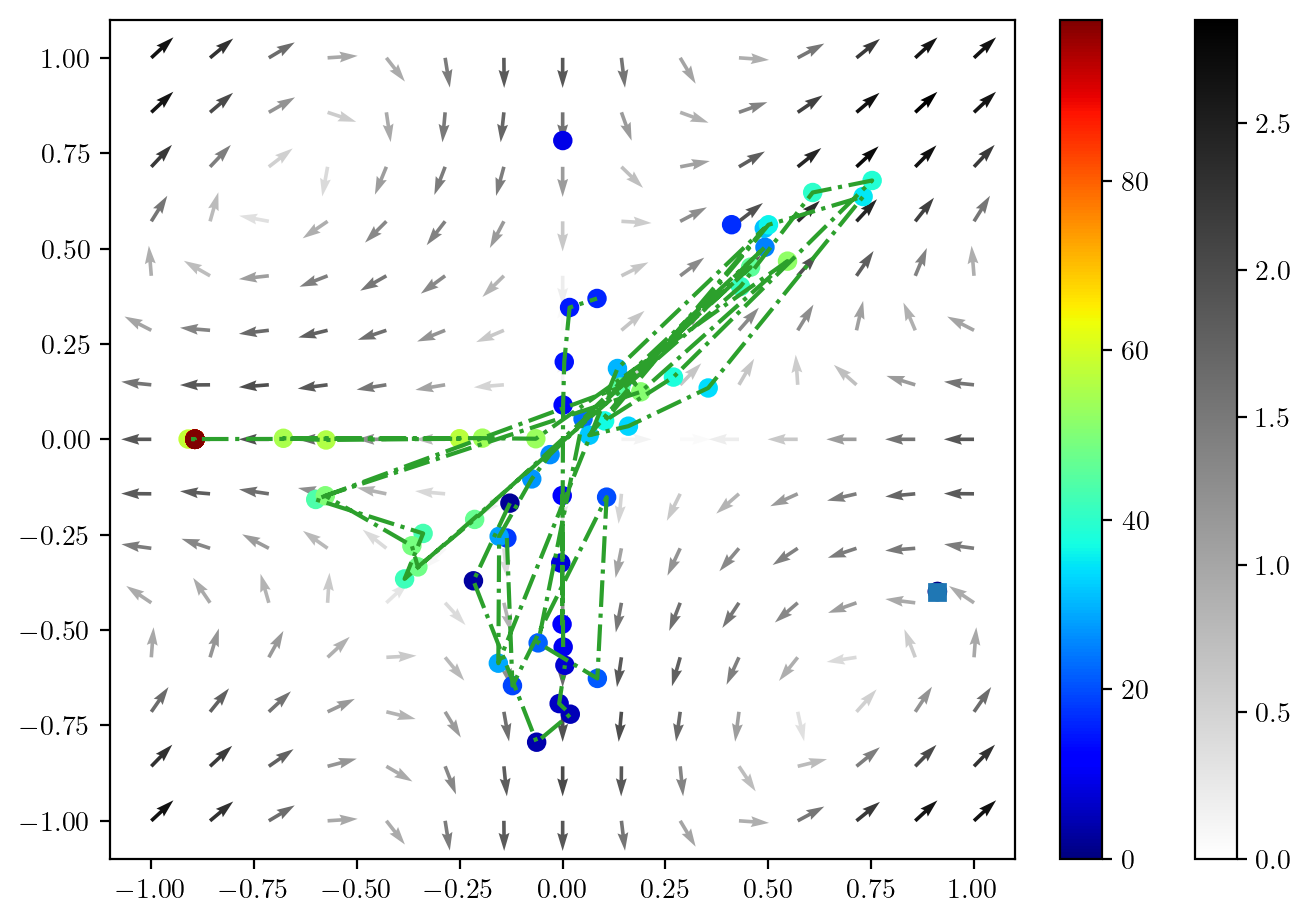

In [104]:
update_fun, update_order, eval_dt = '1fe', (0, 0), 1
# update_fun, update_order, eval_dt = '5bs', (1e-9, 1e-12), 0.01
nptc, calculate_fun = 3, 'do_phaseLag2D'
ini_t, max_t, Xlim = np.float64(0), 100, 10
alpha, rot_noise, localRange, phaseLag_rdm_fct, align = 0.56, 0, 1e12, 0, 6
seed = None

problem_kwargs = {
    'ini_t':            ini_t,
    'max_t':            max_t,
    'update_fun':       update_fun,
    'update_order':     update_order,
    'eval_dt':          eval_dt,
    'calculate_fun':    calculate_fun_dict[calculate_fun],
    'prbHandle':        prbHandle_dict[calculate_fun],
    'rltHandle':        rltHandle_dict[calculate_fun],
    'ptcHandle':        ptcHandle_dict[calculate_fun],
    'fileHandle':       'try_phaseLag2D',
    'save_every':       np.int64(1),
    'nptc':             np.int64(nptc),
    'overlap_epsilon':  np.float64(0),
    'un':               np.float64(1),
    'ln':               np.float64(-1),
    'Xlim':             np.float64(Xlim),
    'Xrange':           np.float64(Xlim),
    'attract':          np.float64(0),
    'align':            np.float64(align),
    'viewRange':        np.float64(1),
    'localRange':       np.float64(localRange),
    'phaseLag2D':       np.float64(alpha) * np.pi,
    'AR_k1':            np.float64(0),
    'AR_k2':            np.float64(0),
    'AR_k3':            np.float64(0),
    'AR_k4':            np.float64(0),
    'rot_noise':        np.float64(rot_noise), 
    'trs_noise':        np.float64(0), 
    'phaseLag_rdm_fct': np.float64(phaseLag_rdm_fct) * np.pi, 
    'seed':             seed,
    'tqdm_fun':         tqdm_notebook,
}

doPrb1 = problem_kwargs['calculate_fun'](**problem_kwargs)
prb1 = doPrb1.do_calculate(ini_t=ini_t, max_t=max_t, eval_dt=eval_dt, )
# do_hdf5(prb1, **problem_kwargs)
# prb1.hdf5_load(showInfo=False)

################################################################################3
figsize = np.array((16, 9)) * 0.3
dpi = 200 if 'inline' in matplotlib.get_backend() else 100
plt_tmin, plt_tmax = ini_t, max_t
resampling_fct, interp1d_kind = 1, 'linear'
vmin, vmax = 0, prb1.align
norm = None
cmap = plt.get_cmap('viridis')
sps.show_fig_fun(prb1, sps.core_avrPhaseVelocity, figsize=figsize, dpi=dpi, 
                 plt_tmin=plt_tmin, plt_tmax=plt_tmax, resampling_fct=resampling_fct, cmap=cmap, 
                 vmin=None, vmax=None, norm=norm, tavr=40, return_info=True)

deta1_fun = lambda meat1, meta2, alpha, align: -align / 2 * (2 * np.sin(meat1) * np.cos(alpha) + np.sin(meta2 + alpha) + np.sin(meat1 - meta2 - alpha))
deta2_fun = lambda meat1, meta2, alpha, align: -align / 2 * (2 * np.sin(meta2) * np.cos(alpha) + np.sin(meat1 + alpha) + np.sin(meta2 - meat1 - alpha))
alpha = prb1.kwargs['phaseLag2D']
align = prb1.kwargs['align']
eta1_hist = spf.warpToPi(prb1.obj_list[2].phi_hist - prb1.obj_list[0].phi_hist)
eta2_hist = spf.warpToPi(prb1.obj_list[2].phi_hist - prb1.obj_list[1].phi_hist)
deta1_hist = spf.warpToPi(prb1.obj_list[2].W_hist - prb1.obj_list[0].W_hist)
deta2_hist = spf.warpToPi(prb1.obj_list[2].W_hist - prb1.obj_list[1].W_hist)
# deta1_hist = deta1_fun(eta1_hist, eta2_hist, alpha, align)
# deta2_hist = deta2_fun(eta1_hist, eta2_hist, alpha, align)
#
eta1, eta2 = np.meshgrid(np.linspace(-1, 1, 15) * np.pi, np.linspace(-1, 1, 15) * np.pi)
deta1 = deta1_fun(eta1, eta2, alpha, align)
deta2 = deta2_fun(eta1, eta2, alpha, align)

# figsize = np.array((19, 9)) * 0.5
# dpi = 200
# cmap=plt.get_cmap('bwr')
# fig, axs = plt.subplots(1, 2, figsize=figsize, dpi=dpi, constrained_layout=True)
# fig.patch.set_facecolor('white')
# axi = axs[0]
# c = axi.pcolor(eta1 / np.pi, eta2 / np.pi, deta1 / np.pi, cmap=cmap, shading='auto')
# clb = fig.colorbar(c, ax=axi)
# clb.ax.set_title('$ | \\langle \\dot{\\eta_1} \\rangle | $', fontsize='small')
# axi.set_xlabel('$\\eta_1$')
# axi.set_ylabel('$\\eta_2$')
# # sps.colorline(eta1_hist / np.pi, eta2_hist / np.pi, ax=axi,  cmap=plt.get_cmap('Greys'), linewidth=0.3, alpha=1.0)
# axi.plot(eta1_hist / np.pi, eta2_hist / np.pi)
# # axi.plot(eta1_hist[0] / np.pi, eta2_hist[0] / np.pi, 's')
# axi = axs[1]
# c = axi.pcolor(eta1 / np.pi, eta2 / np.pi, deta2 / np.pi, cmap=cmap, shading='auto')
# clb = fig.colorbar(c, ax=axi)
# clb.ax.set_title('$ | \\langle \\dot{\\eta_2} \\rangle | $', fontsize='small')
# axi.set_xlabel('$\\eta_1$')
# axi.set_ylabel('$\\eta_2$')
# # sps.colorline(eta1_hist / np.pi, eta2_hist / np.pi, ax=axi,  cmap=plt.get_cmap('Greys'), linewidth=0.3, alpha=1.0)
# axi.plot(eta1_hist / np.pi, eta2_hist / np.pi)
# # axi.plot(eta1_hist[0] / np.pi, eta2_hist[0] / np.pi, 's')

figsize = np.array((13, 9)) * 0.5
dpi = 200
plt_eta_max_idx = -1
cmap=plt.get_cmap('gray_r')
fig, axi = plt.subplots(1, 1, figsize=figsize, dpi=dpi, constrained_layout=True)
fig.patch.set_facecolor('white')
tnorm = np.sqrt(deta1 ** 2 + deta2 ** 2)
norm = Normalize(vmin=0, vmax=np.max(np.abs(tnorm / np.pi)))
cqu = axi.quiver(eta1 / np.pi, eta2 / np.pi, deta1 / tnorm, deta2 / tnorm, tnorm / np.pi, 
                 norm=norm, cmap=cmap, angles='xy', scale=30)
# axi.plot(eta1_hist / np.pi, eta2_hist / np.pi, '.C1')
cmap = plt.get_cmap('jet')
csc = axi.scatter(eta1_hist[:plt_eta_max_idx] / np.pi, eta2_hist[:plt_eta_max_idx] / np.pi, 
                  c=prb1.t_hist[:plt_eta_max_idx], cmap=cmap)
spr_idx = sps.separate_idx(np.vstack([eta1_hist, eta2_hist]))
for tidx0, tidx1 in spr_idx:
    axi.plot(eta1_hist[tidx0:tidx1] / np.pi, eta2_hist[tidx0:tidx1] / np.pi, '-.C2')
axi.plot(eta1_hist[0] / np.pi, eta2_hist[0] / np.pi, 's')
fig.colorbar(cqu)
fig.colorbar(csc)


In [87]:
separate_idx = sps.separate_idx(np.vstack([eta1_hist, eta2_hist]))
# separate_idx2 = sps.separate_idx(eta2_hist)
# print(separate_idx1)
# print(separate_idx2)

In [88]:
separate_idx1

array([[  0,   2],
       [  3,   6],
       [  7,  11],
       [ 12,  16],
       [ 17,  21],
       [ 22,  27],
       [ 28,  31],
       [ 32,  37],
       [ 38,  41],
       [ 42,  46],
       [ 47,  52],
       [ 53,  57],
       [ 58,  61],
       [ 62,  67],
       [ 68,  71],
       [ 72,  76],
       [ 77,  81],
       [ 82,  87],
       [ 88,  91],
       [ 92,  96],
       [ 97, 101],
       [102, 107],
       [108, 111],
       [112, 117],
       [118, 121],
       [122, 126],
       [127, 131],
       [132, 137],
       [138, 141],
       [142, 146],
       [147, 151],
       [152, 156],
       [157, 162],
       [163, 166],
       [167, 172],
       [173, 176],
       [177, 182],
       [183, 186],
       [187, 192],
       [193, 196],
       [197, 201],
       [202, 207],
       [208, 211],
       [212, 216],
       [217, 221],
       [222, 227],
       [228, 231],
       [232, 236],
       [237, 241],
       [242, 247],
       [248, 251],
       [252, 256],
       [257,